In [1]:
import pandas 
import numpy as np
import os
import re
import operator
import math
import h5py
import json
import pickle
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
import torchvision.models as torchmodels
from lib.data_embedding import *
import nrrd
import lib.configs as configs
from model.encoder_text import *
from model.encoder_shape import *
from model.encoder_attn import *

/home/davech2y/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [52]:
# voxel = 32
# modelid2idx = {}
# idx = 0
# for phase in ["train", "val", "test"]:
#     split = pickle.load(open("data/shapenet_split_{}.p".format(phase), "rb"))['data']
#     split_modelid2idx = {}
#     for item in split:
#         if item[0] not in modelid2idx.keys():
#             modelid2idx[item[0]] = idx
#             idx += 1
    
#     for item in split:
#         if item[0] not in split_modelid2idx.keys():
#             split_modelid2idx[item[0]] = modelid2idx[item[0]]
    
#     split = {
#         'data': split,
#         'modelid2idx': split_modelid2idx
#     }
#     pickle.dump(split, open("data/shapenet_split_{}.p".format(phase), "wb"))
            
# with h5py.File("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_{}_solid.hdf5".format(voxel), "w", libver="latest") as database:
#     dataset = database.create_dataset("volume", (len(modelid2idx), 4 * voxel * voxel * voxel), dtype=float)
#     for idx, modelid in enumerate(modelid2idx.keys()):
#         model = nrrd.read("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_{}_solid/{}/{}.nrrd".format(voxel, modelid, modelid))[0].astype("float16")
#         model /= 255.
#         model = model.reshape((1, -1))
#         dataset[idx] = model
#         if (idx + 1) % 100 == 0:
#             print("preprocessed and stored: {}, {} left".format(idx + 1, len(modelid2idx) - idx - 1))

preprocessed and stored: 100, 14799 left
preprocessed and stored: 200, 14699 left
preprocessed and stored: 300, 14599 left
preprocessed and stored: 400, 14499 left
preprocessed and stored: 500, 14399 left
preprocessed and stored: 600, 14299 left
preprocessed and stored: 700, 14199 left
preprocessed and stored: 800, 14099 left
preprocessed and stored: 900, 13999 left
preprocessed and stored: 1000, 13899 left
preprocessed and stored: 1100, 13799 left
preprocessed and stored: 1200, 13699 left
preprocessed and stored: 1300, 13599 left
preprocessed and stored: 1400, 13499 left
preprocessed and stored: 1500, 13399 left
preprocessed and stored: 1600, 13299 left
preprocessed and stored: 1700, 13199 left
preprocessed and stored: 1800, 13099 left
preprocessed and stored: 1900, 12999 left
preprocessed and stored: 2000, 12899 left
preprocessed and stored: 2100, 12799 left
preprocessed and stored: 2200, 12699 left
preprocessed and stored: 2300, 12599 left
preprocessed and stored: 2400, 12499 left
p

In [171]:
# import time

# database = h5py.File("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_64_solid.hdf5", "r")

# start = time.time()
# voxel = database['volume'][5].reshape((4, 64, 64, 64))
# voxel = torch.FloatTensor(voxel)
# print("time: {}".format(time.time() - start))

# start = time.time()
# voxel = nrrd.read("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_{}_solid/{}/{}.nrrd".format(64, 'e702f89ce87a0b6579368d1198f406e7', 'e702f89ce87a0b6579368d1198f406e7'))[0]
# voxel = torch.FloatTensor(voxel)
# voxel /= 255.
# print("time: {}".format(time.time() - start))

time: 0.004527091979980469
time: 0.006757020950317383


In [20]:
# shape_path = "../text2shape/outputs/primitives/encoder_logdir/2018-06-25_10-45-32/test/shape_embeddings_{}.p"
# text_path = "../text2shape/outputs/primitives/encoder_logdir/2018-06-25_10-45-32/test/text_embeddings_{}.p"
# idx2word = json.load(open("../text2shape/data/primitives/primitives.json", 'rb'))['idx_to_word']
# # cat_mapping = {'04379243': 'table', '03001627': 'chair'}
# for phase in ["train", "val", "test"]:
#     pretrained = []
#     shapes = pickle.load(open(shape_path.format(phase), "rb"))['caption_embedding_tuples']
#     shapes = {item[2].split('.')[0]: (item[3], item[4]) for item in shapes}
#     texts = pickle.load(open(text_path.format(phase), "rb"))['caption_embedding_tuples']
#     for item in texts:
#         model_id = item[2].split('.')[0]
# #         model_cat = cat_mapping[item[1]]
#         model_cat = item[1]
#         model_cap = [idx2word[str(idx)] for idx in item[0] if idx != 0]
#         model_emb = shapes[model_id][0]
#         model_interm = shapes[model_id][1].squeeze().transpose(3, 0, 1, 2)
#         pretrained.append((model_id, model_cat, model_cap, model_emb, model_interm))
#     pickle.dump(pretrained, open("pretrained/primitive_embeddings_{}.p".format(phase), 'wb'))

In [22]:
# temp = pickle.load(open("pretrained/primitive_embeddings_test.p", 'rb'))

In [9]:
# dic = json.load(open("../text2shape/data/shapenet/shapenet.json"))['idx_to_word']
# cat_map = {
#     '03001627': 'chair',
#     '04379243': 'table'
# }
# for phase in ["train", "val", "test"]:
#     temp = pickle.load(open("/home/davech2y/text2shape/data/shapenet/processed_captions_{}.p".format(phase), 'rb'))['caption_tuples']
#     result = []
#     for item in temp:
#         model_id = item[2]
#         model_cat = cat_map[item[1]]
#         model_cap = [dic[str(word)] for word in item[0] if word != 0]
#         result.append((model_id, model_cat, model_cap))
#     pickle.dump(result, open("pretrained/shapenet_split_{}.p".format(phase), 'wb'))

In [3]:
# pickle.load(open("pretrained/shapenet_split_train.p", 'rb'))[1]

In [4]:
# dic = json.load(open("../text2shape/data/shapenet/shapenet.json"))
# dic.keys()

In [2]:
shapenet = Shapenet(
    [
        pickle.load(open("data/shapenet_split_train.p", 'rb')),
        pickle.load(open("data/shapenet_split_val.p", 'rb')),
        pickle.load(open("data/shapenet_split_test.p", 'rb'))
    ],
    [
        -1,
        -1,
        -1
    ],
    100,
    False
)

In [3]:
# train_ds = ShapenetDataset(shapenet.train_data_agg, shapenet.train_idx2label, 32)
# train_dl = DataLoader(train_ds, batch_size=10, shuffle=False, collate_fn=collate_shapenet, drop_last=True)
# val_ds = ShapenetDataset(shapenet.val_data, shapenet.val_idx2label, 32)
# val_dl = DataLoader(val_ds, batch_size=200, shuffle=False, collate_fn=collate_shapenet, drop_last=True)

In [3]:
shape_encoder_path = "outputs/embedding/shapenet_v64_trs11921_lr0.0002_wd0.0005_e10_bs32_adaptive2.1-b/models/encoder.pth"
shape_encoder = AdaptiveEncoder(shapenet.dict_idx2word.__len__(), "2.1-b").cuda()
shape_encoder.load_state_dict(torch.load(shape_encoder_path))
shape_encoder.eval()
text_encoder = None

In [4]:
phase = "val"
voxel = 64
dataset = ShapenetDataset(
    getattr(shapenet, 
    "{}_data".format(phase)), 
    getattr(shapenet, "{}_idx2label".format(phase)), 
    getattr(shapenet, "{}_label2idx".format(phase)), 
    voxel,
    h5py.File(CONF.PATH.SHAPENET_DATABASE.format(voxel), "r")
)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False, collate_fn=collate_shapenet)

In [5]:
for idx, (model_id, shape, text, _, _, _) in enumerate(dataloader):
    if idx == 5:
        shape = shape.cuda()
        text = text.cuda()
        shape_embedding, text_embedding, weights, attn_mask = shape_encoder(shape, text)
        break

In [26]:
idx = 5
model_id[idx]

'5370b493b077fdd39ccda3ab71692a66'

In [27]:
" ".join([shapenet.dict_idx2word[str(idx.item())] for idx in text[idx]])

'it be a square table . it be blue in color . it be make in metal frame <PAD> <PAD>'

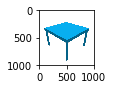

In [73]:
img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_64_solid/{}/{}.png".format(model_id[idx], model_id[idx]))
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.show()

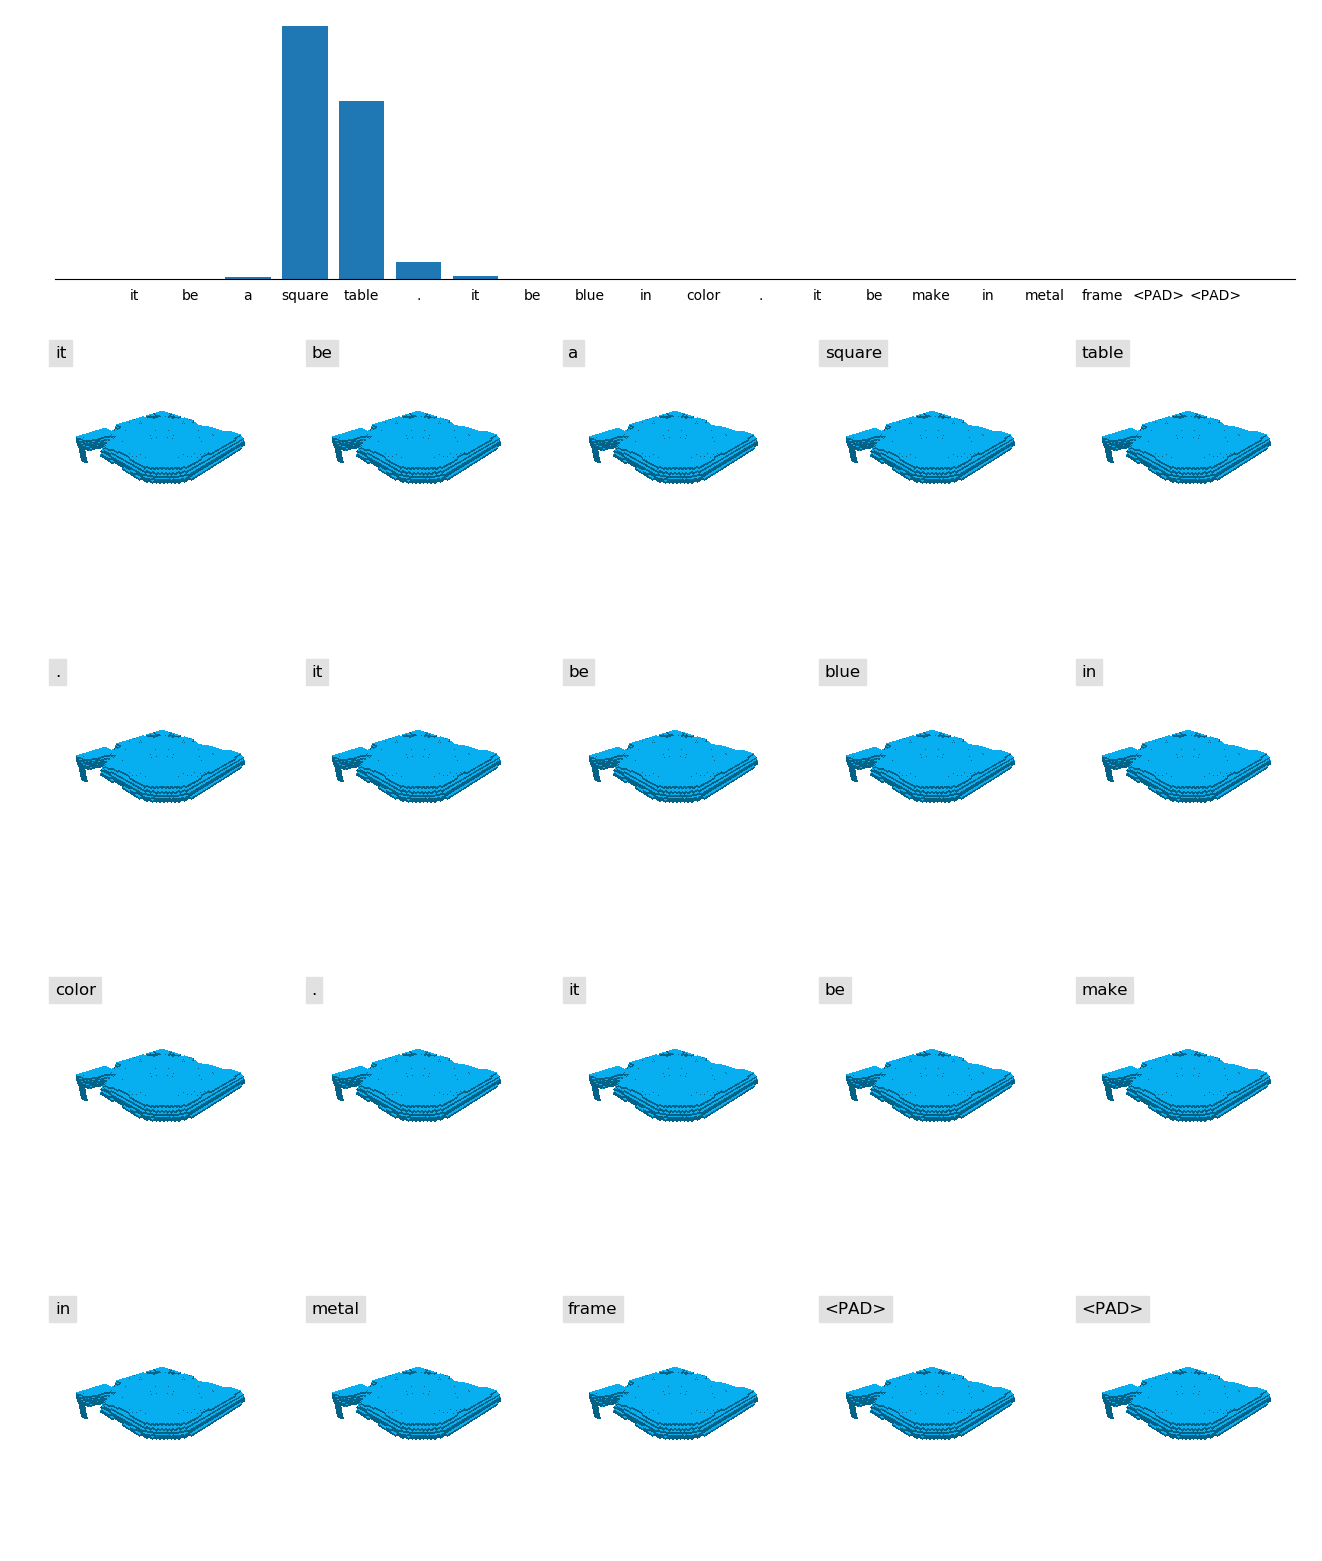

In [36]:
import matplotlib
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

matplotlib.style.use('default')
fig = plt.figure()
fig.set_size_inches(16, 20)

plt.subplot2grid((5, 5), (0, 0), colspan=5)
mask = attn_mask[idx][0].data.cpu().numpy()
cap = [shapenet.dict_idx2word[str(idx.item())] for idx in text[idx]]
plt.bar(range(20), mask, tick_label=cap, edgecolor='none')
for i, spine in enumerate(plt.gca().spines.values()):
    if i == 2:
        continue
    spine.set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
    
for i in range(20):
    plt.subplot2grid((5, 5), (i // 5 + 1, i % 5))
#     img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_64_solid/{}/{}.png".format(model_id[idx], model_id[idx]))
    img = Image.open("testdata.png")
    plt.axis("off")
    plt.imshow(img)
    plt.text(0, 0, cap[i], fontsize=12, bbox=dict(facecolor='#e1e1e1', edgecolor='#e1e1e1'))

plt.show()

In [30]:
from scipy.ndimage import zoom

spatial_mask = weights[3][idx].view(8, 8, 8).data.cpu().numpy()
spatial_mask = zoom(spatial_mask, (8, 8, 8))
spatial_mask = (spatial_mask * 255).astype(np.uint8)
# spatial_mask = np.vstack([spatial_mask[np.newaxis, :]] * 4)
# spatial_mask[:3, :, :, :] = 128

model_path = "/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_64_solid/{}/{}.nrrd".format(model_id[idx], model_id[idx])
readdata, header = nrrd.read(model_path)

temp = np.zeros((4, 64, 64, 64))
temp[0][spatial_mask != 0] = readdata[0][spatial_mask != 0]
temp[1][spatial_mask != 0] = readdata[1][spatial_mask != 0]
temp[2][spatial_mask != 0] = readdata[2][spatial_mask != 0]
temp[3][spatial_mask != 0] = readdata[3][spatial_mask != 0]
temp = temp.astype(np.uint8)
temp = np.swapaxes(temp, 1, 2)
temp = np.swapaxes(temp, 1, 3)

filename = 'testdata.nrrd'
nrrd.write(filename, temp)

In [127]:
temp.shape

(64, 64, 64)

In [36]:
readdata, header = nrrd.read(filename)

In [37]:
header

{'keyvaluepairs': {},
 'type': 'float',
 'dimension': 4,
 'sizes': [1, 8, 8, 8],
 'endian': 'little',
 'encoding': 'gzip'}

In [201]:
header

{'keyvaluepairs': {},
 'type': 'uint8',
 'dimension': 4,
 'sizes': [4, 64, 64, 64],
 'encoding': 'gzip',
 'endian': 'little',
 'content': '3dw.52b667b2014bdf0482db9fca4b68095_rgba.vox',
 'space dimension': 3,
 'space origin': ['-0.24409900605678558',
  '-0.38922199606895447',
  '-0.28963300585746765'],
 'space directions': ['none',
  ['0', '0.002817152300849557', '0'],
  ['0', '0', '0.002817152300849557'],
  ['0.002817152300849557', '0', '0']]}

In [28]:
os.environ["CUDA_VISIBLE_DEVICES"] = '2' 
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
shape_encoder = torch.load("outputs/embedding/shapenet_v32_trs59777_lr0.0002_wd0.0005_e50_bs100_mp3/models/shape_encoder.pth").cpu()
text_encoder = torch.load("outputs/embedding/shapenet_v32_trs59777_lr0.0002_wd0.0005_e50_bs100_mp3/models/text_encoder.pth").cpu()
shape_encoder.eval()
text_encoder.eval()
for temp in val_dl:
    shape = temp[1].index_select(0, torch.LongTensor([i * 2 for i in range(temp[1].size(0) // 2)]))
    text = temp[2]
    labels = temp[4]
    s = shape_encoder(shape)
    t = text_encoder(text)
    break

In [29]:
import torch.nn.functional as F

# similarity
sim = s.matmul(t.transpose(1, 0).contiguous())
# walk
s2t = F.softmax(sim, dim=1)
t2s = F.softmax(sim.transpose(1, 0), dim=1)
# build inputs
inputs = s2t.matmul(t2s)

In [30]:
inputs

tensor([[ 0.2892,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0007],
        [ 0.0000,  0.0002,  0.0030,  ...,  0.0000,  0.0003,  0.0000],
        [ 0.0000,  0.0002,  0.0052,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0118,  0.0374,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0014,  0.4001,  0.0000],
        [ 0.0024,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0464]])

In [2]:
embedding = pickle.load(open("outputs/embedding/[best]shapenet_v32_trs11921_lr0.0002_wd0.0005_e20_bs100_mp4/embeddings/val.p", "rb"))

In [3]:
embedding[list(embedding.keys())[0]]

{'shape_embedding': array([-1.44096315e+00,  6.84841037e-01,  2.81806946e-01, -2.48719692e-01,
        -3.14458162e-01, -8.70351717e-02,  1.10215080e+00,  2.17024118e-01,
         7.31549740e-01, -2.64792711e-01, -6.01978123e-01, -8.07973683e-01,
        -2.97370017e-01, -1.91140205e-01, -1.02348618e-01,  1.28076982e+00,
         6.43196031e-02,  8.50308761e-02,  2.74745286e-01,  7.80641198e-01,
        -2.79009849e-01,  1.90730944e-01, -2.94902295e-01, -1.11165690e+00,
        -7.85948038e-01,  1.36400118e-01, -2.76460290e-01, -2.25772217e-01,
         2.32095909e+00,  3.82624120e-01, -4.63964462e-01, -5.30714929e-01,
         1.24416292e+00, -1.16423738e+00, -1.34841299e+00, -6.66971684e-01,
        -1.40251029e+00, -7.77148783e-01,  7.91970074e-01,  1.06015515e+00,
         3.74485314e-01,  2.10365728e-01, -5.63763499e-01, -1.21586251e+00,
         9.62270737e-01,  1.48683131e+00, -6.25698090e-01,  5.41641116e-01,
         7.37102330e-01,  7.56719828e-01, -6.28419220e-02,  6.5788108

In [59]:
keys = list(embedding.keys())
shape_embedding = []
text_embedding = []
shape_label = []
text_label = []
text_raw = []
mask = []
count = 0
text_retrieval_label = {}
for idx, key in enumerate(keys):
    emb = embedding[key]
    shape_embedding.append(emb['shape_embedding'].reshape(1, -1))
    shape_label.append(idx)
    text_embedding.extend([emb['text_embedding'][i][1].reshape(1, -1) for i in range(len(emb['text_embedding']))])
    text_raw.extend([emb['text_embedding'][i][0] for i in range(len(emb['text_embedding']))])
    text_label.extend([idx for _ in range(len(emb['text_embedding']))])
    mask.append(count)
    count += len(emb['text_embedding'])

shape_embedding = np.concatenate(shape_embedding)
text_embedding = np.concatenate(text_embedding)

In [60]:
S2T = shape_embedding.dot(text_embedding.T)
T2S = text_embedding.dot(shape_embedding.T)

In [61]:
S2T = nn.Softmax(dim=1)(torch.FloatTensor(S2T))
T2S = nn.Softmax(dim=1)(torch.FloatTensor(T2S))

In [75]:
shape_gt = torch.LongTensor(shape_label)
text_gt = torch.LongTensor(text_label)

s2t_gt = shape_gt.unsqueeze(1).expand(shape_gt.size(0), text_gt.size(0)).eq(text_gt.unsqueeze(0).expand(shape_gt.size(0), text_gt.size(0))).float()
s2t_gt /= s2t_gt.sum(1, keepdim=True)


t2s_gt = text_gt.unsqueeze(1).expand(text_gt.size(0), shape_gt.size(0)).eq(shape_gt.unsqueeze(0).expand(text_gt.size(0), shape_gt.size(0))).float()
t2s_gt /= t2s_gt.sum(1, keepdim=True)

In [72]:
s2t_gt /= s2t_gt.sum(1, keepdim=True)

In [65]:
torch.LongTensor(shape_label).size()

torch.Size([1486])

In [114]:
temp = torch.abs(t2s_gt - T2S).topk(5)[1]

In [115]:
temp

tensor([[    0,   894,   613,  1429,   153],
        [    0,   760,   894,   934,   223],
        [    0,   223,   772,   961,  1348],
        ...,
        [ 1485,   288,   873,   509,    50],
        [ 1485,  1155,   497,   739,   248],
        [ 1485,   940,   956,  1435,   769]])

In [41]:
keys[0]

'a3f369c885720efc459b850e737e0048'

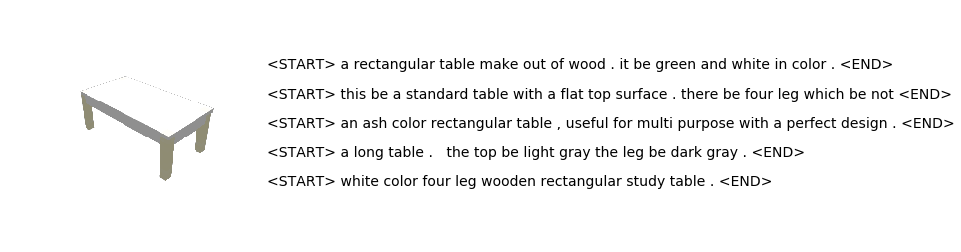

In [88]:
img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
plt.imshow(img.resize((224, 224)))
plt.text(240, 60, text_raw[temp[0][0].item()], fontsize=14)
plt.text(240, 90, text_raw[temp[0][1].item()], fontsize=14)
plt.text(240, 120, text_raw[temp[0][2].item()], fontsize=14)
plt.text(240, 150, text_raw[temp[0][3].item()], fontsize=14)
plt.text(240, 180, text_raw[temp[0][4].item()], fontsize=14)
plt.axis('off')
plt.show()

/home/davech2y/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


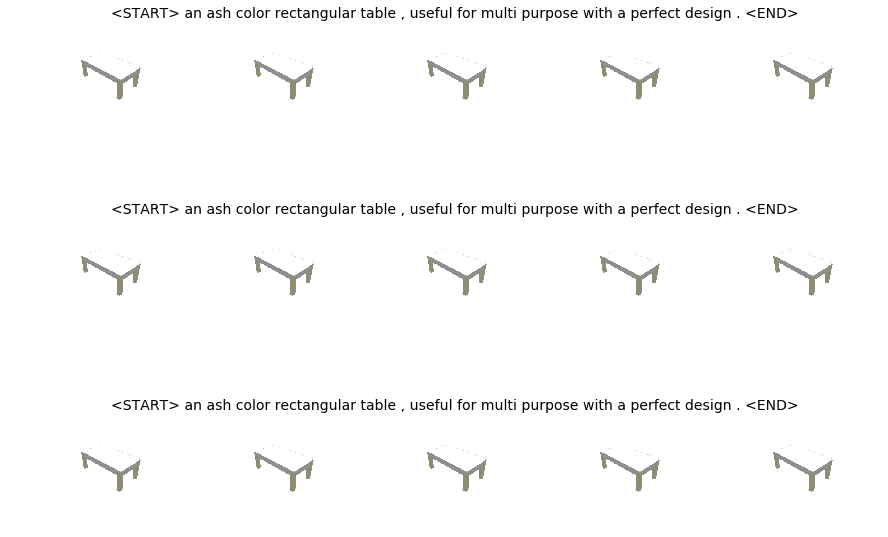

In [134]:
import matplotlib.gridspec as gridspec

fig = plt.gcf()
fig.set_size_inches(15,9)
outer = gridspec.GridSpec(3, 1, wspace=0.2, hspace=1)

for i in range(3):
    inner = gridspec.GridSpecFromSubplotSpec(1, 5,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.2)
    ax = plt.Subplot(fig, outer[i])
    ax.set_title(text_raw[0], fontsize=14)
    ax.axis('off')
    fig.add_subplot(ax)

    for j in range(5):
        ax = plt.Subplot(fig, inner[j])
        img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
        ax.imshow(img.resize((224, 224)))
        ax.axis('off')
        fig.add_subplot(ax)

#     fig.tight_layout()
fig.show()

# plt.axis('off')
# plt.subplot(1, 5, 1)
# img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
# plt.imshow(img.resize((224, 224)))
# plt.axis('off')
# plt.subplot(1, 5, 2)
# img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
# plt.imshow(img.resize((224, 224)))
# plt.axis('off')
# plt.subplot(1, 5, 3)
# img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
# plt.imshow(img.resize((224, 224)))
# plt.axis('off')
# plt.subplot(1, 5, 4)
# img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
# plt.imshow(img.resize((224, 224)))
# plt.axis('off')
# plt.subplot(1, 5, 5)
# img = Image.open("/mnt/raid/davech2y/ShapeNetCore_vol/nrrd_256_filter_div_32_solid/{}/{}.png".format(keys[0], keys[0]))
# plt.imshow(img.resize((224, 224)))
# plt.axis('off')
# plt.show()

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = '2' 
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

for item in train_dl:
    shape = item[1].cuda()
    break

In [6]:
outputs = nn.Conv3d(4, 64, 3, stride=2, padding=1).cuda()(shape)
outputs = nn.Conv3d(64, 128, 3, stride=2, padding=1).cuda()(outputs)
outputs = nn.Conv3d(128, 256, 3, stride=2, padding=1).cuda()(outputs)
outputs.size()

torch.Size([200, 256, 4, 4, 4])

In [10]:
outputs = nn.Conv3d(4, 16, 3, stride=1, padding=1).cuda()(shape)
outputs.size()

torch.Size([10, 16, 128, 128, 128])

In [6]:
targets = (labels.unsqueeze(1).matmul(labels.unsqueeze(0)) == 1).float()
targets /= targets.sum(1)

In [7]:
sim = t.matmul(s.transpose(1, 0).contiguous())

In [8]:
t2s = F.softmax(sim, dim=1)
s2t = F.softmax(sim.transpose(1, 0), dim=1)

In [9]:
inputs = t2s.matmul(s2t)

In [15]:
sim



Columns 0 to 7 
 14.8459  15.7078  14.4437  14.8524  12.6893  12.0384  10.7845  13.2234
 14.7809  15.6388  14.3813  14.7887  12.6346  11.9864  10.7379  13.1663
 14.7503  15.6067  14.3511  14.7581  12.6079  11.9613  10.7153  13.1389
 14.7845  15.6425  14.3844  14.7920  12.6377  11.9889  10.7403  13.1698
 14.9920  15.8627  14.5861  14.9992  12.8148  12.1572  10.8910  13.3541
 15.0489  15.9236  14.6412  15.0557  12.8631  12.2030  10.9322  13.4044
 14.9920  15.8633  14.5860  14.9991  12.8147  12.1569  10.8910  13.3540
 15.0168  15.8895  14.6100  15.0236  12.8357  12.1770  10.9089  13.3758
 15.1191  15.9982  14.7096  15.1261  12.9235  12.2599  10.9834  13.4672
 15.1143  15.9931  14.7047  15.1211  12.9192  12.2560  10.9798  13.4628
 15.0777  15.9542  14.6693  15.0846  12.8880  12.2264  10.9532  13.4303
 15.1289  16.0087  14.7189  15.1357  12.9317  12.2679  10.9904  13.4757
 15.1318  16.0117  14.7217  15.1386  12.9342  12.2702  10.9925  13.4783
 15.1309  16.0107  14.7208  15.1376  12.9334  

In [19]:
MetricLoss()(s, t, labels)


 32.4985
[torch.FloatTensor of size ()]

In [9]:
pos, neg = [], []
for pair in itertools.permutations(range(labels.size(0)), 2):
    if labels[pair[0]] == labels[pair[1]]:
        pos.append(pair)
    else:
        neg.append(pair)

In [14]:
neg

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 7),
 (0, 10),
 (0, 11),
 (0, 12),
 (1, 0),
 (1, 6),
 (1, 8),
 (1, 9),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (2, 0),
 (2, 6),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 0),
 (3, 6),
 (3, 8),
 (3, 9),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 0),
 (4, 6),
 (4, 8),
 (4, 9),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 0),
 (5, 6),
 (5, 8),
 (5, 9),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 10),
 (6, 11),
 (6, 12),
 (7, 0),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16),
 (7, 17),
 (7, 18),
 (7, 19),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 7),
 (8, 10),
 (8, 11),
 (8, 12),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 7),
 (9, 10),
 (9, 11),
 (9, 12),
 (10, 0),
 (10, 6),
 (10, 8)

In [50]:
global_results = []
for pos_pair in pos:
    neg_i = [item for item in neg if item[0] == pos_pair[0]]
    neg_j = [item for item in neg if item[0] == pos_pair[1]]
#     if not neg_i and not neg_j:
#         continue
    V_i = torch.sum(torch.FloatTensor([(1. + t[item[0]].dot(s[item[1]])).exp() for item in neg_i]))
    V_j = torch.sum(torch.FloatTensor([(1. + t[item[0]].dot(s[item[1]])).exp() for item in neg_j]))
    max_ij = (V_i + V_j).log() - (t[pos_pair[0]].dot(s[pos_pair[1]]))
    max_ij = torch.max(max_ij, torch.zeros(max_ij.size()))
    local_result = max_ij.pow(2)
    global_results.append(local_result.unsqueeze(0))
    print("({}, {})".format(pos_pair[0], pos_pair[1]))
    print("V_i", V_i.item())
    print("V_j", V_j.item())
    print("max_ij", max_ij.item())
    print("local_result", local_result.item())
    print()
ml_loss = torch.cat(global_results).sum().div(2 * len(pos))

(0, 6)
V_i 24.511388778686523
V_j 24.512819290161133
max_ij 3.89066481590271
local_result 15.137272834777832

(0, 8)
V_i 24.511388778686523
V_j 24.513622283935547
max_ij 3.8901126384735107
local_result 15.132976531982422

(0, 9)
V_i 24.511388778686523
V_j 24.513607025146484
max_ij 3.890256881713867
local_result 15.134099006652832

(0, 13)
V_i 24.511388778686523
V_j 24.515430450439453
max_ij 3.890803813934326
local_result 15.138354301452637

(0, 14)
V_i 24.511388778686523
V_j 24.515663146972656
max_ij 3.8899831771850586
local_result 15.131969451904297

(0, 15)
V_i 24.511388778686523
V_j 24.51559829711914
max_ij 3.8902759552001953
local_result 15.134246826171875

(0, 16)
V_i 24.511388778686523
V_j 24.51572608947754
max_ij 3.890169143676758
local_result 15.133416175842285

(0, 17)
V_i 24.511388778686523
V_j 24.516340255737305
max_ij 3.8905537128448486
local_result 15.136407852172852

(0, 18)
V_i 24.511388778686523
V_j 24.516307830810547
max_ij 3.890671968460083
local_result 15.13732814788

(9, 6)
V_i 24.513607025146484
V_j 24.512819290161133
max_ij 3.890766143798828
local_result 15.1380615234375

(9, 8)
V_i 24.513607025146484
V_j 24.513622283935547
max_ij 3.8904969692230225
local_result 15.135966300964355

(9, 13)
V_i 24.513607025146484
V_j 24.515430450439453
max_ij 3.890956163406372
local_result 15.13953971862793

(9, 14)
V_i 24.513607025146484
V_j 24.515663146972656
max_ij 3.890497922897339
local_result 15.135973930358887

(9, 15)
V_i 24.513607025146484
V_j 24.51559829711914
max_ij 3.8902974128723145
local_result 15.134413719177246

(9, 16)
V_i 24.513607025146484
V_j 24.51572608947754
max_ij 3.890244722366333
local_result 15.134003639221191

(9, 17)
V_i 24.513607025146484
V_j 24.516340255737305
max_ij 3.890627861022949
local_result 15.136984825134277

(9, 18)
V_i 24.513607025146484
V_j 24.516307830810547
max_ij 3.890723466873169
local_result 15.137728691101074

(9, 19)
V_i 24.513607025146484
V_j 24.51637840270996
max_ij 3.890976905822754
local_result 15.139700889587402

V_i 24.516307830810547
V_j 24.516340255737305
max_ij 3.8906426429748535
local_result 15.137100219726562

(18, 19)
V_i 24.516307830810547
V_j 24.51637840270996
max_ij 3.890840530395508
local_result 15.138640403747559

(19, 0)
V_i 24.51637840270996
V_j 24.511388778686523
max_ij 3.8906118869781494
local_result 15.136860847473145

(19, 6)
V_i 24.51637840270996
V_j 24.512819290161133
max_ij 3.8908252716064453
local_result 15.138521194458008

(19, 8)
V_i 24.51637840270996
V_j 24.513622283935547
max_ij 3.890543222427368
local_result 15.136326789855957

(19, 9)
V_i 24.51637840270996
V_j 24.513607025146484
max_ij 3.890381336212158
local_result 15.135066986083984

(19, 13)
V_i 24.51637840270996
V_j 24.515430450439453
max_ij 3.8910531997680664
local_result 15.140295028686523

(19, 14)
V_i 24.51637840270996
V_j 24.515663146972656
max_ij 3.8907861709594727
local_result 15.138216972351074

(19, 15)
V_i 24.51637840270996
V_j 24.51559829711914
max_ij 3.890390157699585
local_result 15.135135650634766



In [46]:
max_ij = torch.Tensor(max_ij.size()).fill_(-1)

In [49]:
torch.max(max_ij, torch.zeros(max_ij.size()))


 3.8932
[torch.FloatTensor of size ()]

In [33]:
[t[item[0]].dot(t[item[1]]) for item in neg_j]

[
  0.3171
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3206
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3231
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3455
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3419
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3398
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3597
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3589
 [torch.cuda.FloatTensor of size () (GPU 0)], 
  0.3548
 [torch.cuda.FloatTensor of size () (GPU 0)]]

In [20]:
neg_i

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 10), (0, 11), (0, 12)]

In [17]:
target = (temp[4].unsqueeze(1).matmul(temp[4].unsqueeze(0)) == 1).float()
# target /= target.sum(1)
target_p = target / target.sum(1)

In [18]:
target_p



Columns 0 to 9 
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.0000  0.0909  0.0909  0.0000  0.0000  0.0000  0.0909  0.0909  0.0909  0.0000
 0.1111  0.0000  0.0000  0.1111  0.1111  0.1111  0.0000  0.0000  0.0000  0.1111
 0.0000  0.0909  0.090

In [19]:
s = ShapenetShapeEncoder().cuda()(shape)
t = ShapenetTextEncoder(shapenet.dict_idx2word.__len__()).cuda()(text)

In [31]:
nn.Sequential(
    nn.Conv3d(4, 64, 3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv3d(64, 128, 3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv3d(128, 256, 3, stride=1, padding=1),
    nn.ReLU(),
    nn.AvgPool3d(kernel_size=4, stride=4)
).cuda()(shape).size()

torch.Size([20, 256, 8, 8, 8])

In [26]:
from lib.losses import MetricLoss

metric_tt = MetricLoss(margin=1.)
metric_tt(s, t, temp[4])


 7.9119
[torch.FloatTensor of size ()]

In [21]:
sim = t.matmul(s.transpose(1, 0).contiguous())

In [23]:
import torch.nn.functional as F

t2s = F.softmax(sim, dim=1)
s2t = F.softmax(sim.transpose(1, 0), dim=1)

In [24]:
torch.FloatTensor(1, t2s.size(1)).fill_(1./t2s.size(1)).cuda()



Columns 0 to 9 
1.00000e-02 *
  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000

Columns 10 to 19 
1.00000e-02 *
  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000  5.0000
[torch.cuda.FloatTensor of size (1,20) (GPU 0)]

In [25]:
-1 * (torch.FloatTensor(1, t2s.size(1)).fill_(1./t2s.size(1)).cuda() * t2s.mean(0, keepdim=True).log()).sum()


 3.0071
[torch.cuda.FloatTensor of size () (GPU 0)]

In [32]:
s2t


 0.1005  0.1003  0.0995  0.0990  0.0988  0.1014  0.1001  0.1002  0.1001  0.1002
 0.0997  0.0991  0.0999  0.0997  0.1000  0.1007  0.1001  0.1003  0.1002  0.1002
 0.0998  0.0994  0.0999  0.0987  0.1001  0.1012  0.1002  0.1003  0.1002  0.1003
 0.1000  0.1005  0.0994  0.0990  0.0993  0.1012  0.1001  0.1002  0.1001  0.1002
 0.1002  0.0997  0.0999  0.0991  0.0997  0.1012  0.1000  0.1001  0.1001  0.1001
 0.1000  0.0997  0.0997  0.0985  0.0999  0.1012  0.1001  0.1003  0.1002  0.1003
 0.1026  0.0993  0.1008  0.0944  0.1005  0.1054  0.0991  0.0994  0.0992  0.0993
 0.1007  0.0988  0.0986  0.0989  0.0994  0.1023  0.1003  0.1004  0.1003  0.1004
 0.1000  0.0998  0.1001  0.0994  0.0999  0.1006  0.1000  0.1001  0.1000  0.1000
 0.1006  0.1003  0.0999  0.0994  0.0996  0.1003  0.1000  0.1000  0.1000  0.1000
[torch.cuda.FloatTensor of size (10,10) (GPU 0)]

In [61]:
-1 * (target_p.cuda() * s2t.matmul(t2s).log()).sum()


 24.4612
[torch.cuda.FloatTensor of size () (GPU 0)]

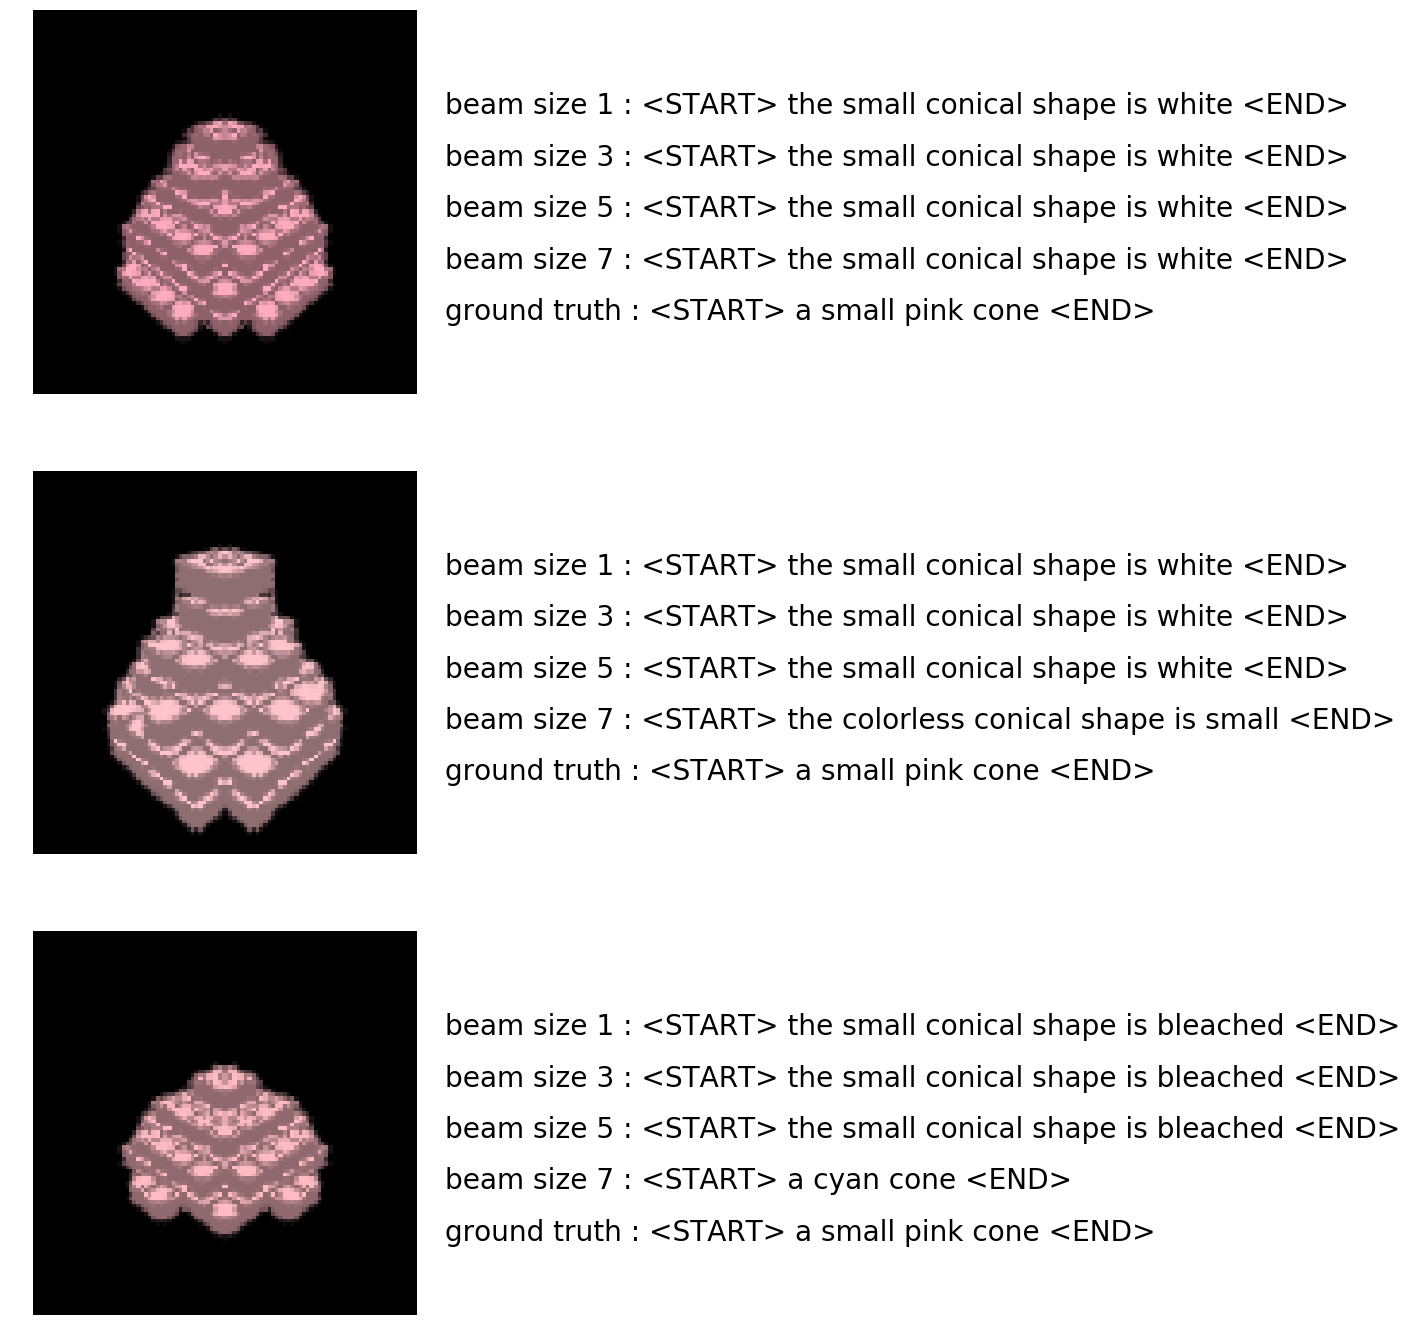

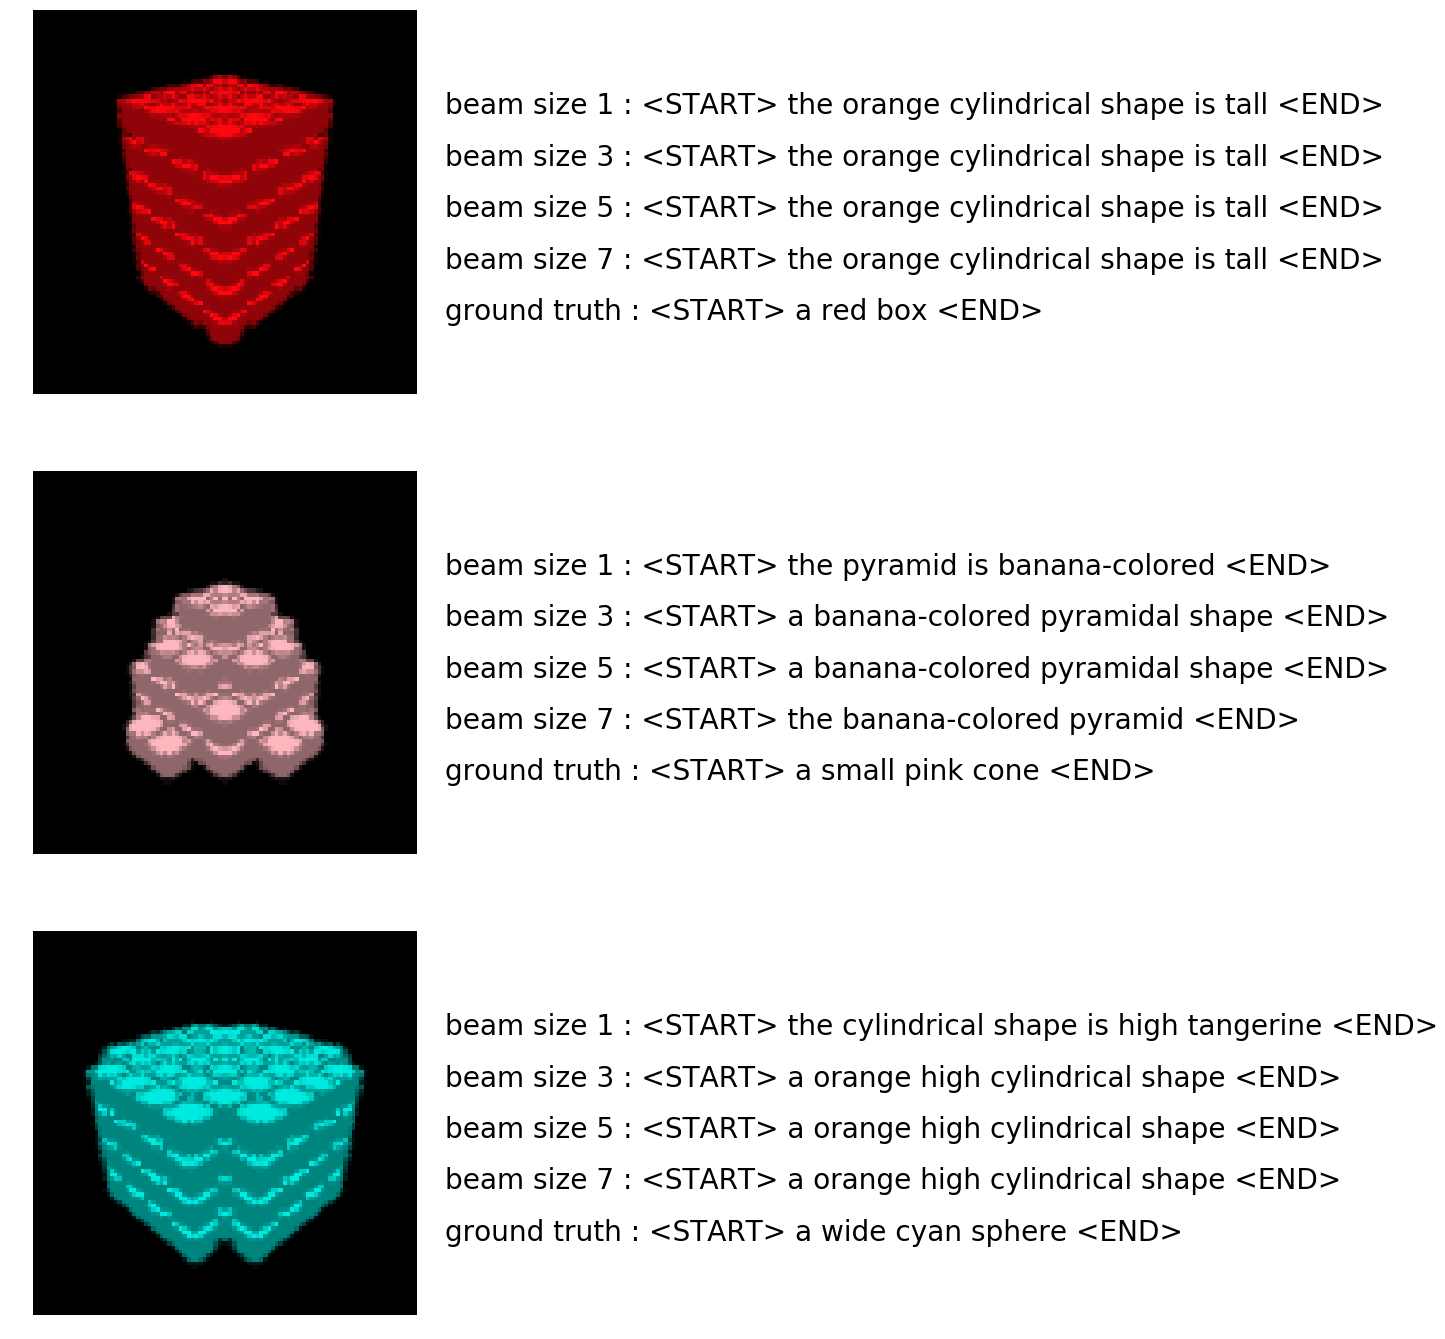

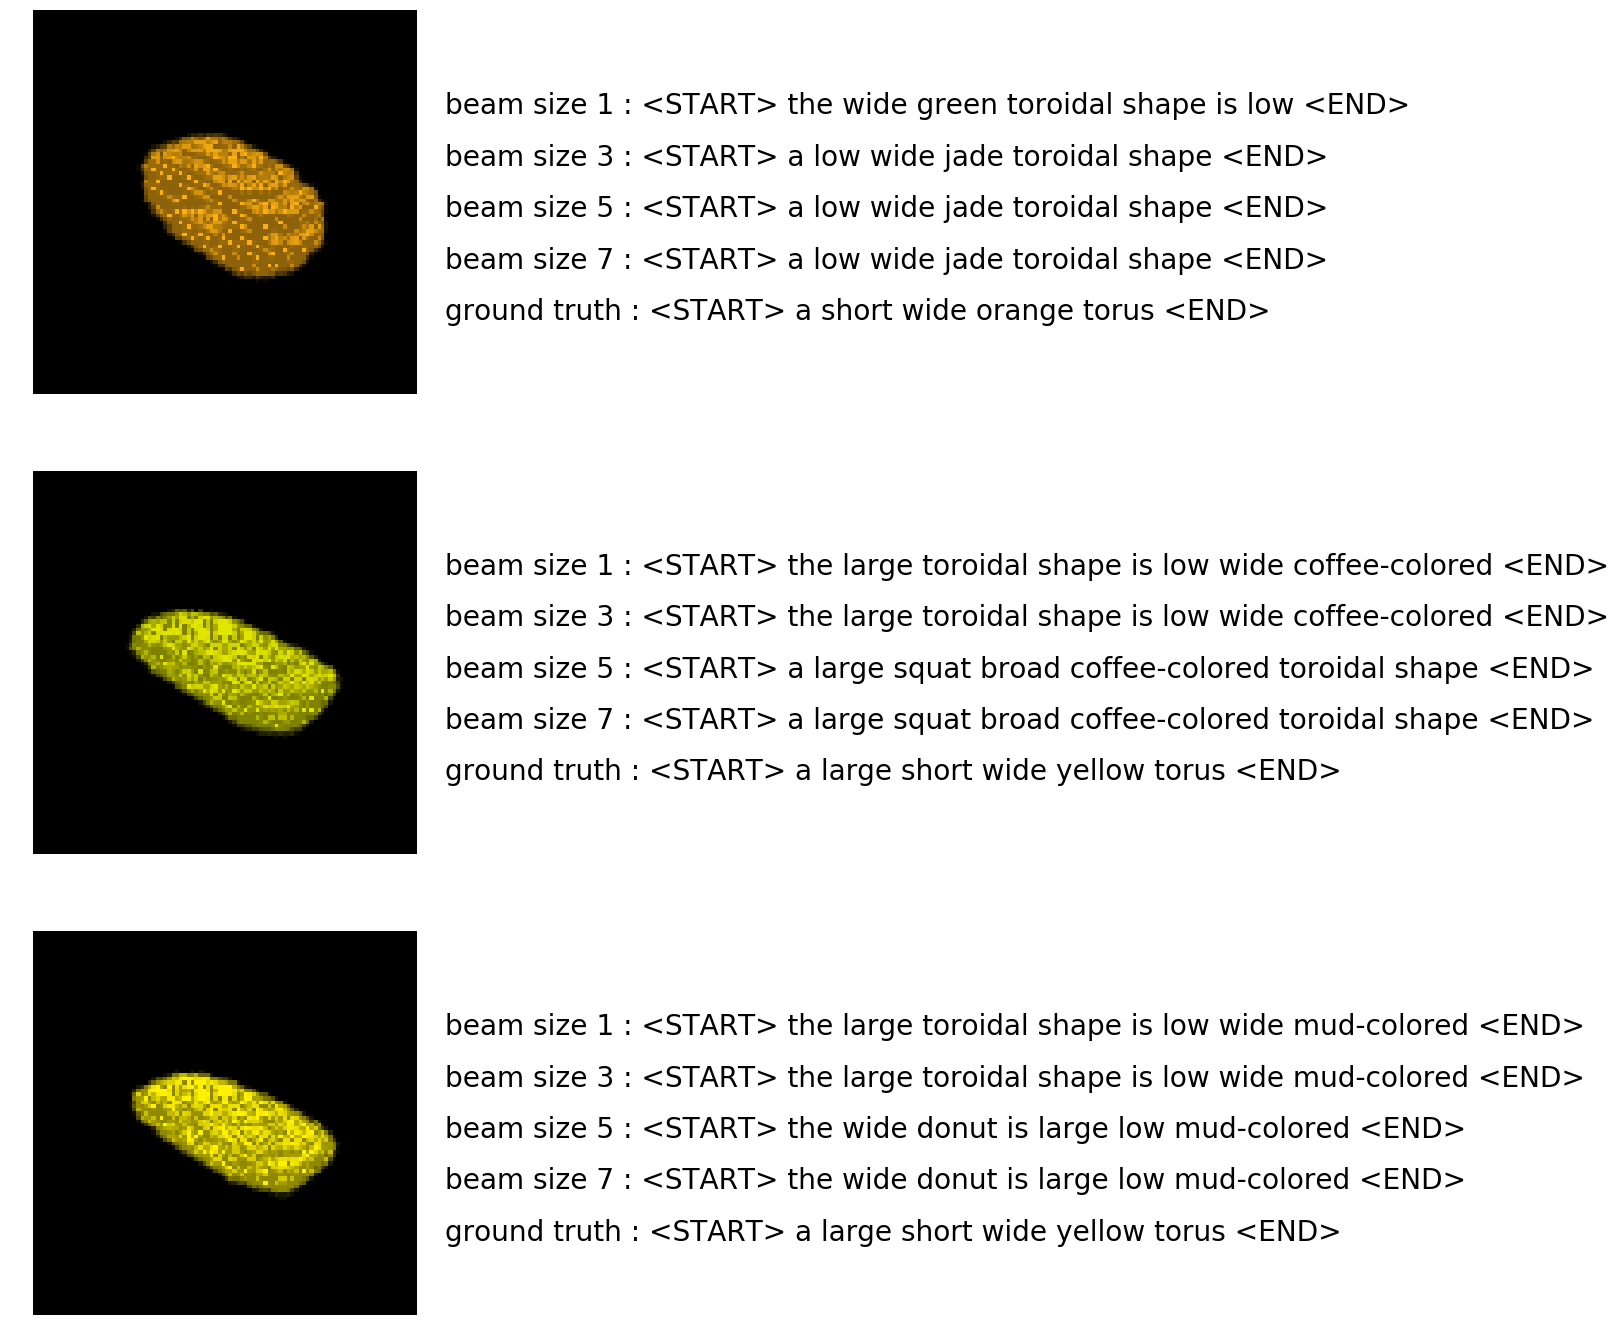

In [7]:
for q in ["high", "low", "medium"]:
    fig = plt.figure()
    fig.set_size_inches(8, 24)
    fig.set_facecolor('white')
    fig.clf()
    for i in range(report.num):
        image_id = report.chosen['1'][q][i][0]
        plt.subplot(report.num, 1, i+1)
        if report.mode == 'shapenet':
            plt.imshow(Image.open(os.path.join(configs.SHAPE_ROOT, "{}/{}.png".format(image_id, image_id))).convert('RGB').resize((224, 224)))
        elif report.mode == 'primitive':
            category = image_id.split("_")[0]
            plt.imshow(Image.open(os.path.join(configs.PRIMITIVE_ROOT, "{}/{}.png".format(category, image_id))).convert('RGB').resize((224, 224)))
        plt.text(240, 60, 'beam size 1 : ' + report.chosen['1'][q][i][1], fontsize=28)
        plt.text(240, 90, 'beam size 3 : ' + report.chosen['3'][q][i][1], fontsize=28)
        plt.text(240, 120, 'beam size 5 : ' + report.chosen['5'][q][i][1], fontsize=28)
        plt.text(240, 150, 'beam size 7 : ' + report.chosen['7'][q][i][1], fontsize=28)
        plt.text(240, 180, 'ground truth : ' + report.chosen['7'][q][i][2], fontsize=28)
        plt.axis('off')
    plt.savefig("results/{}/{}.png".format('primitive_trs-1_vs-1_ts-1_e10_lr0.00010_w0.00000_bs100_vocab82_beam1', q), bbox_inches="tight")

In [4]:
embeddings.test_ref['912c044ef5e129522c98a1adaac88b94']

['<START> it be snooker table . it have four big bolt like leg with wheel . it be gray <END>',
 '<START> a gray rectangular , plastic , billiards table <END>',
 '<START> a gray pool table with six ball arrange close to the middle of the table and right edge <END>',
 '<START> a light gray billiard table with short leg <END>',
 '<START> a rectangular gray metallic pool table with play design and hole <END>']

In [5]:
embeddings.train_shape_embeddings[0]

['cone-purple-h20-r100_7',
 [2, 5, 10, 55, 30, 7, 6, 4, 15, 3],
 array([-0.30954778, -1.0631198 ,  0.23919123, -0.90227205,  0.22605203,
         0.4639562 ,  1.5414028 ,  1.5219407 ,  0.26338506, -0.54443735,
        -0.5470774 , -1.4460009 , -0.6772784 , -0.8117254 ,  0.2109385 ,
         1.4388828 ,  1.1595566 , -0.47705695, -0.2675017 ,  0.34554398,
        -0.21284734, -1.6830404 ,  0.22878271,  0.1377055 , -2.0047128 ,
         0.67943865,  0.584185  , -1.1389772 , -1.5816462 , -1.4900295 ,
         0.83651495, -1.5533259 , -0.76523983,  0.9978087 , -1.795951  ,
         0.45825952, -0.158198  ,  0.62943995,  0.8215487 ,  1.5230236 ,
        -0.15779808,  0.17975995,  1.3166527 ,  0.62977844,  0.30981296,
        -0.29574785,  0.06533388, -0.5937129 ,  0.46514064, -0.6880022 ,
         0.71581024, -0.6132881 , -0.66100043, -1.3207359 ,  0.78911227,
        -0.70480686,  0.65450895, -0.7761598 ,  0.66075265, -0.41949284,
         1.341408  ,  0.28785104, -0.5544744 , -0.02707972, 

In [36]:
phase = 'train'
embeddings = pickle.load(open("/home/davech2y/text2shape/outputs/primitives/encoder_logdir/2018-06-25_10-45-32/test/shape_embeddings_{}.p".format(phase), 'rb'))
temp = {}
for item in embeddings['caption_embedding_tuples']:
    temp[item[2].split('.')[0]] = item[3]
embeddings = temp

split = pickle.load(open("/home/davech2y/text2shape/data/primitives/processed_captions_{}.p".format(phase), 'rb'))
split = split['caption_tuples']
prep = []
idx2word = json.load(open('/home/davech2y/text2shape/data/primitives/primitives.json'))['idx_to_word']
for item in split:
    prep.append(
        (
            item[2].split('.')[0],
            [idx2word[str(idx)] for idx in item[0] if idx != 0],
            embeddings[item[2].split('.')[0]]
        )
    )
pickle.dump({'caption_embedding_tuples': prep}, open("data/primitive_shape_embeddings_{}.p".format, 'wb'))

In [43]:
model_ids = [item[2] for item in temp['caption_embedding_tuples']]
sorted(model_ids, reverse=True)

In [45]:
sorted(model_ids, reverse=True)

['torus-yellow-h20-r100_9.nrrd',
 'torus-yellow-h20-r100_8.nrrd',
 'torus-yellow-h20-r100_7.nrrd',
 'torus-yellow-h20-r100_6.nrrd',
 'torus-yellow-h20-r100_5.nrrd',
 'torus-yellow-h20-r100_4.nrrd',
 'torus-yellow-h20-r100_3.nrrd',
 'torus-yellow-h20-r100_2.nrrd',
 'torus-yellow-h20-r100_1.nrrd',
 'torus-yellow-h20-r100_0.nrrd',
 'torus-yellow-h100-r100_9.nrrd',
 'torus-yellow-h100-r100_8.nrrd',
 'torus-yellow-h100-r100_7.nrrd',
 'torus-yellow-h100-r100_6.nrrd',
 'torus-yellow-h100-r100_5.nrrd',
 'torus-yellow-h100-r100_4.nrrd',
 'torus-yellow-h100-r100_3.nrrd',
 'torus-yellow-h100-r100_2.nrrd',
 'torus-yellow-h100-r100_1.nrrd',
 'torus-yellow-h100-r100_0.nrrd',
 'torus-white-h20-r50_9.nrrd',
 'torus-white-h20-r50_8.nrrd',
 'torus-white-h20-r50_7.nrrd',
 'torus-white-h20-r50_6.nrrd',
 'torus-white-h20-r50_5.nrrd',
 'torus-white-h20-r50_4.nrrd',
 'torus-white-h20-r50_3.nrrd',
 'torus-white-h20-r50_2.nrrd',
 'torus-white-h20-r50_1.nrrd',
 'torus-white-h20-r50_0.nrrd',
 'torus-red-h100-r20

In [24]:
phase = "test"
temp = pickle.load(open("data/primitive_embeddings_{}.p".format(phase), 'rb'))
shape_embedding = {}
shape_embedding = {item[0]: item[2] for item in temp if item[0] not in shape_embedding.keys()}
# pickle.dump(shape_embedding, open("data/primitive_shape_embedding_{}.p".format(phase), 'wb'))

In [25]:
len(shape_embedding)

750

In [23]:
import configs

df = pandas.read_csv(os.path.join(configs.DATA_ROOT, "captions.tablechair.csv"))
# df.loc[df.modelId == 'e702f89ce87a0b6579368d1198f406e7']
df

id                           modelId  \
0      118462  e702f89ce87a0b6579368d1198f406e7   
1      118461  b654fef8eb98e99d65ba78ad9601cf1b   
2      118460  df5b55da209637624b3c42e318f3affc   
3      118459  791c14d53bd565f56ba14bfd91a75020   
4      118458  6730f663d0e012506f525e79a05bbcb3   
5      118457  35bcb52fea44850bb97ad864945165a1   
6      118456  cd82d526e58e3e7f4fb85ea6fd426098   
7      118455  374bec02e71fe06528b4c5ec471dc963   
8      118454  836157300c030c9a246b9f2ca347e8e3   
9      118453  95039795fd8db944608244cbb9b86bf5   
10     118452  fb1e39667d83506a41dea5e6084523ee   
11     118451  912c044ef5e129522c98a1adaac88b94   
12     118450  791c14d53bd565f56ba14bfd91a75020   
13     118449  26d98eed64a7f76318a93a45bf780820   
14     118448  73b369b9808bc2d0f6ba522682be8978   
15     118447  760b1ea228d6c2f6e785b88cc9024b2a   
16     118446  862f70e73fa70c9b1a719e2a845bdada   
17     118445  495db04c204196ec47c638c0eee4a2b3   
18     118444  894e095c7036c8411933ffef19678834   
19     118443  1dffc3840500e89ab8e1b99345a5afd4   
20     118442  b2c35c8b748491a1684b7bc3f8a9aa55   
21     118441  9dc1371b6989479c9c0ca344f487323e   
22     118440  668deaeb91295739664b3b9b23ddfcbc   
23     118439  c06a8f95fc273106b0f4a0d43d1e4c23   
24     118438  8cfc69d79fca89223a4a5c95fa1b0032   
25     118437  38d5b6ad3077e8b1caa22a10624245b6   
26     118436  a3a701905091355e96aaf875e27b02c9   
27     118435  6131ecb5a6fc9329f51f77a6d7299806   
28     118434  74ae50b70108ca1118775c05a821f9ab   
29     118433  2b110b833111b38c420adf24e49f74c8   
...       ...                               ...   
75330   23700  3cebd4314f773f8ccb9cf5f7d536cddb   
75331   23690  db3f9b48562440acbeedb4c8fd29e2d1   
75332   23689  d1fab6f92fb0682763a371f6fe9862af   
75333   23686  3cebd4314f773f8ccb9cf5f7d536cddb   
75334   23681  ea77c800bba6566aaf7c7ad2549a1b15   
75335   23675  672a6459e7606b23532a8e162f399205   
75336   23634  bae518da1e709e83596f70d1d7edd4bc   
75337   23624  672a6459e7606b23532a8e162f399205   
75338   23617   1ef6c2b9d413fb7c681404257d94ad9   
75339   23613  728fb292d234b43d49a71f577ceadcf5   
75340   23598  177c1102dd46badce958df2e8332e31c   
75341   23583  7a7b08cf81cf358a8616812464c86290   
75342   23571  1f2c84d387bd1af9609fb05dbd8681bd   
75343   23565  db3f9b48562440acbeedb4c8fd29e2d1   
75344   23525  1f2c84d387bd1af9609fb05dbd8681bd   
75345   23502  f1787517791764e74b3c42e318f3affc   
75346   23410  10fbf670bb017ec94ebb593f0d0b4581   
75347   23400  ea77c800bba6566aaf7c7ad2549a1b15   
75348   23363  e5ea39e2b4c28ea2a8df8437731d97b4   
75349   23360  177c1102dd46badce958df2e8332e31c   
75350   23358  177c1102dd46badce958df2e8332e31c   
75351   23356  62c3b6eea96337609ae676623bdd3284   
75352   23306  1f2c84d387bd1af9609fb05dbd8681bd   
75353   23265  62c3b6eea96337609ae676623bdd3284   
75354   23245  8b2c3c73b624c3faf4b35f4029eb1ecf   
75355   23226  10fbf670bb017ec94ebb593f0d0b4581   
75356   23213  bae518da1e709e83596f70d1d7edd4bc   
75357   23185  bae518da1e709e83596f70d1d7edd4bc   
75358   23159   1ef6c2b9d413fb7c681404257d94ad9   
75359   23142  171a3677999c79b32c8109e73b98d509   

                                             description category  \
0      the table is round and has 3 legs. the table i...    Table   
1      the chair is made of plastic and has 4 legs, i...    Chair   
2      It is narrow console table.It is made from ply...    Table   
3      A simple chair with wooden back rest and seati...    Chair   
4      It is simple chiar with comfortable back rest ...    Chair   
5      It is folding wooden lounge chair.It is grey i...    Chair   
6      Classic design with contemporary style glass t...    Table   
7      A stylish brown coloured chair, provided with ...    Chair   
8      A square shaped designery stylish table, with ...    Table   
9      A brown coloured chair with old look, useful f...    Chair   
10     A circular whitish coloured table, provided wi...    Table   
11     It is snooker

In [14]:
df = pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_test2014.caption.csv")

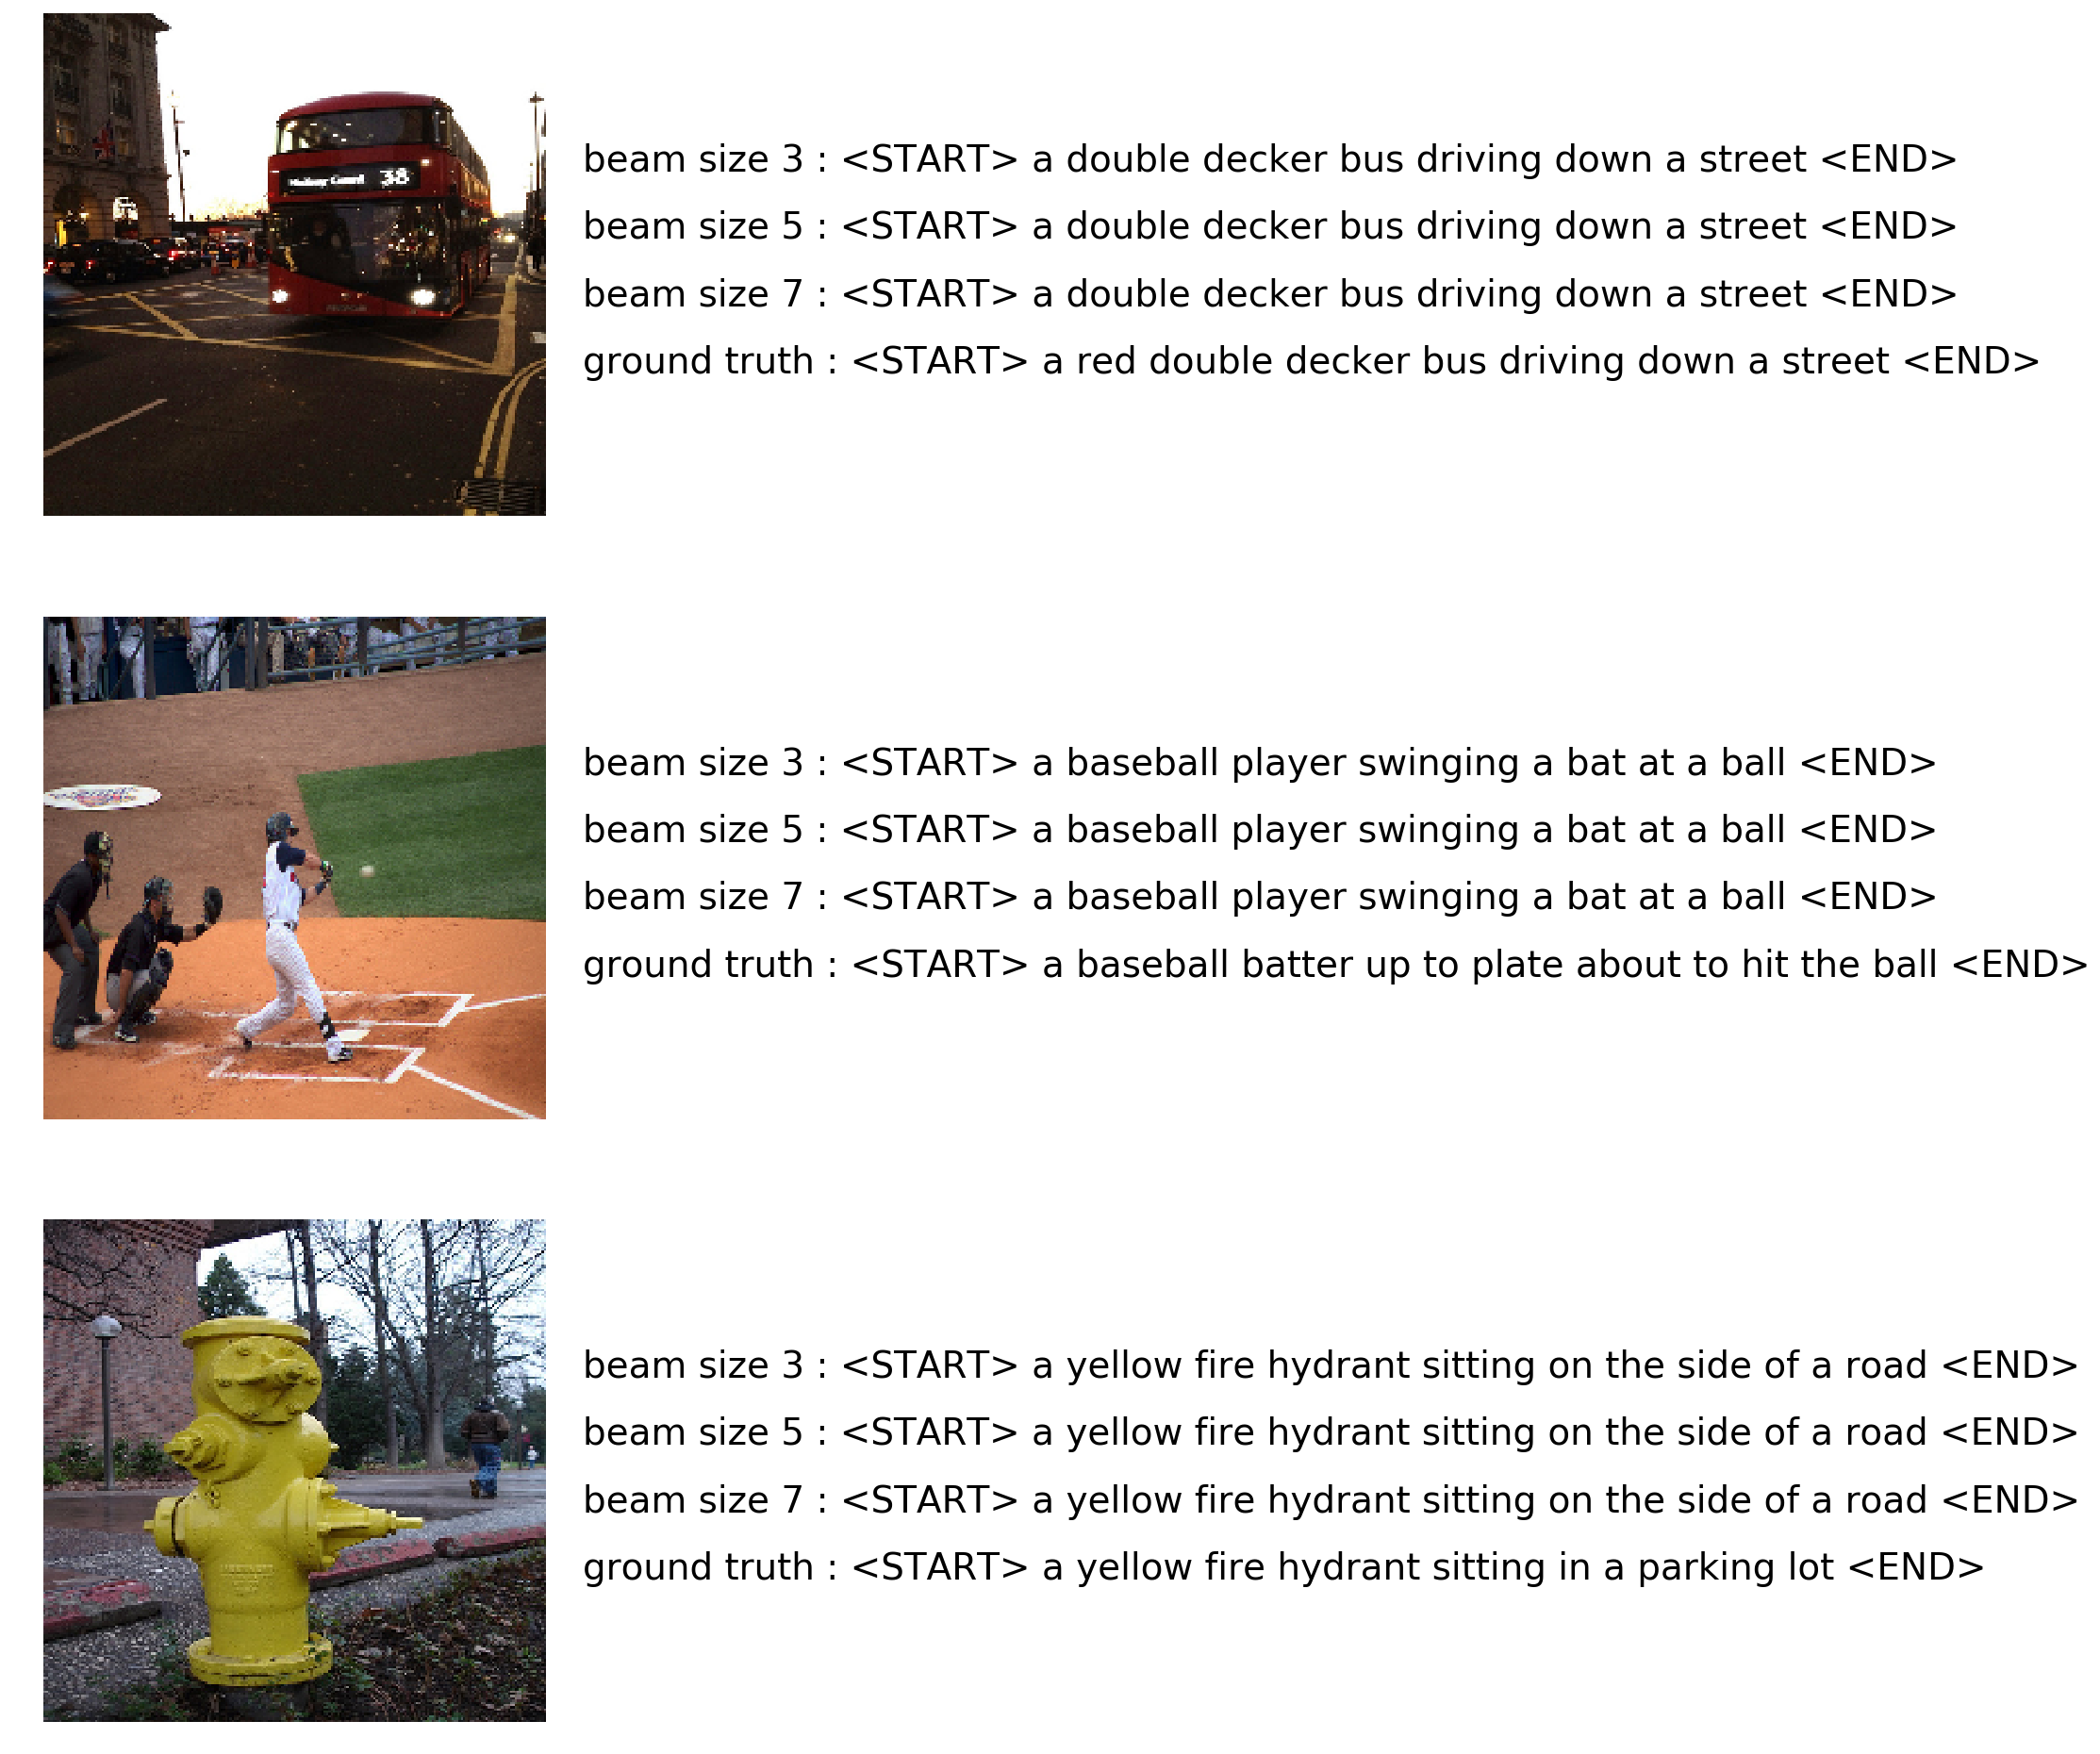

In [65]:
fig = plt.figure(dpi=100)
fig.set_size_inches(8, 24)
fig.set_facecolor('white')
for i in range(3):
    image_id = int(report.chosen['3']['high'][i][0])
    plt.subplot(3, 1, i+1)
    plt.imshow(Image.open("/mnt/raid/davech2y/COCO_2014/val2014/{}".format(df.loc[df.image_id == image_id].file_name.drop_duplicates().iloc[0])).convert('RGBA').resize((224, 224)))
    plt.text(240, 70, 'beam size 3 : ' + report.chosen['3']['high'][i][2], fontsize=28)
    plt.text(240, 100, 'beam size 5 : ' + report.chosen['5']['high'][i][2], fontsize=28)
    plt.text(240, 130, 'beam size 7 : ' + report.chosen['7']['high'][i][2], fontsize=28)
    plt.text(240, 160, 'ground truth : ' + report.chosen['7']['high'][i][3], fontsize=28)
    plt.axis('off')
plt.show()

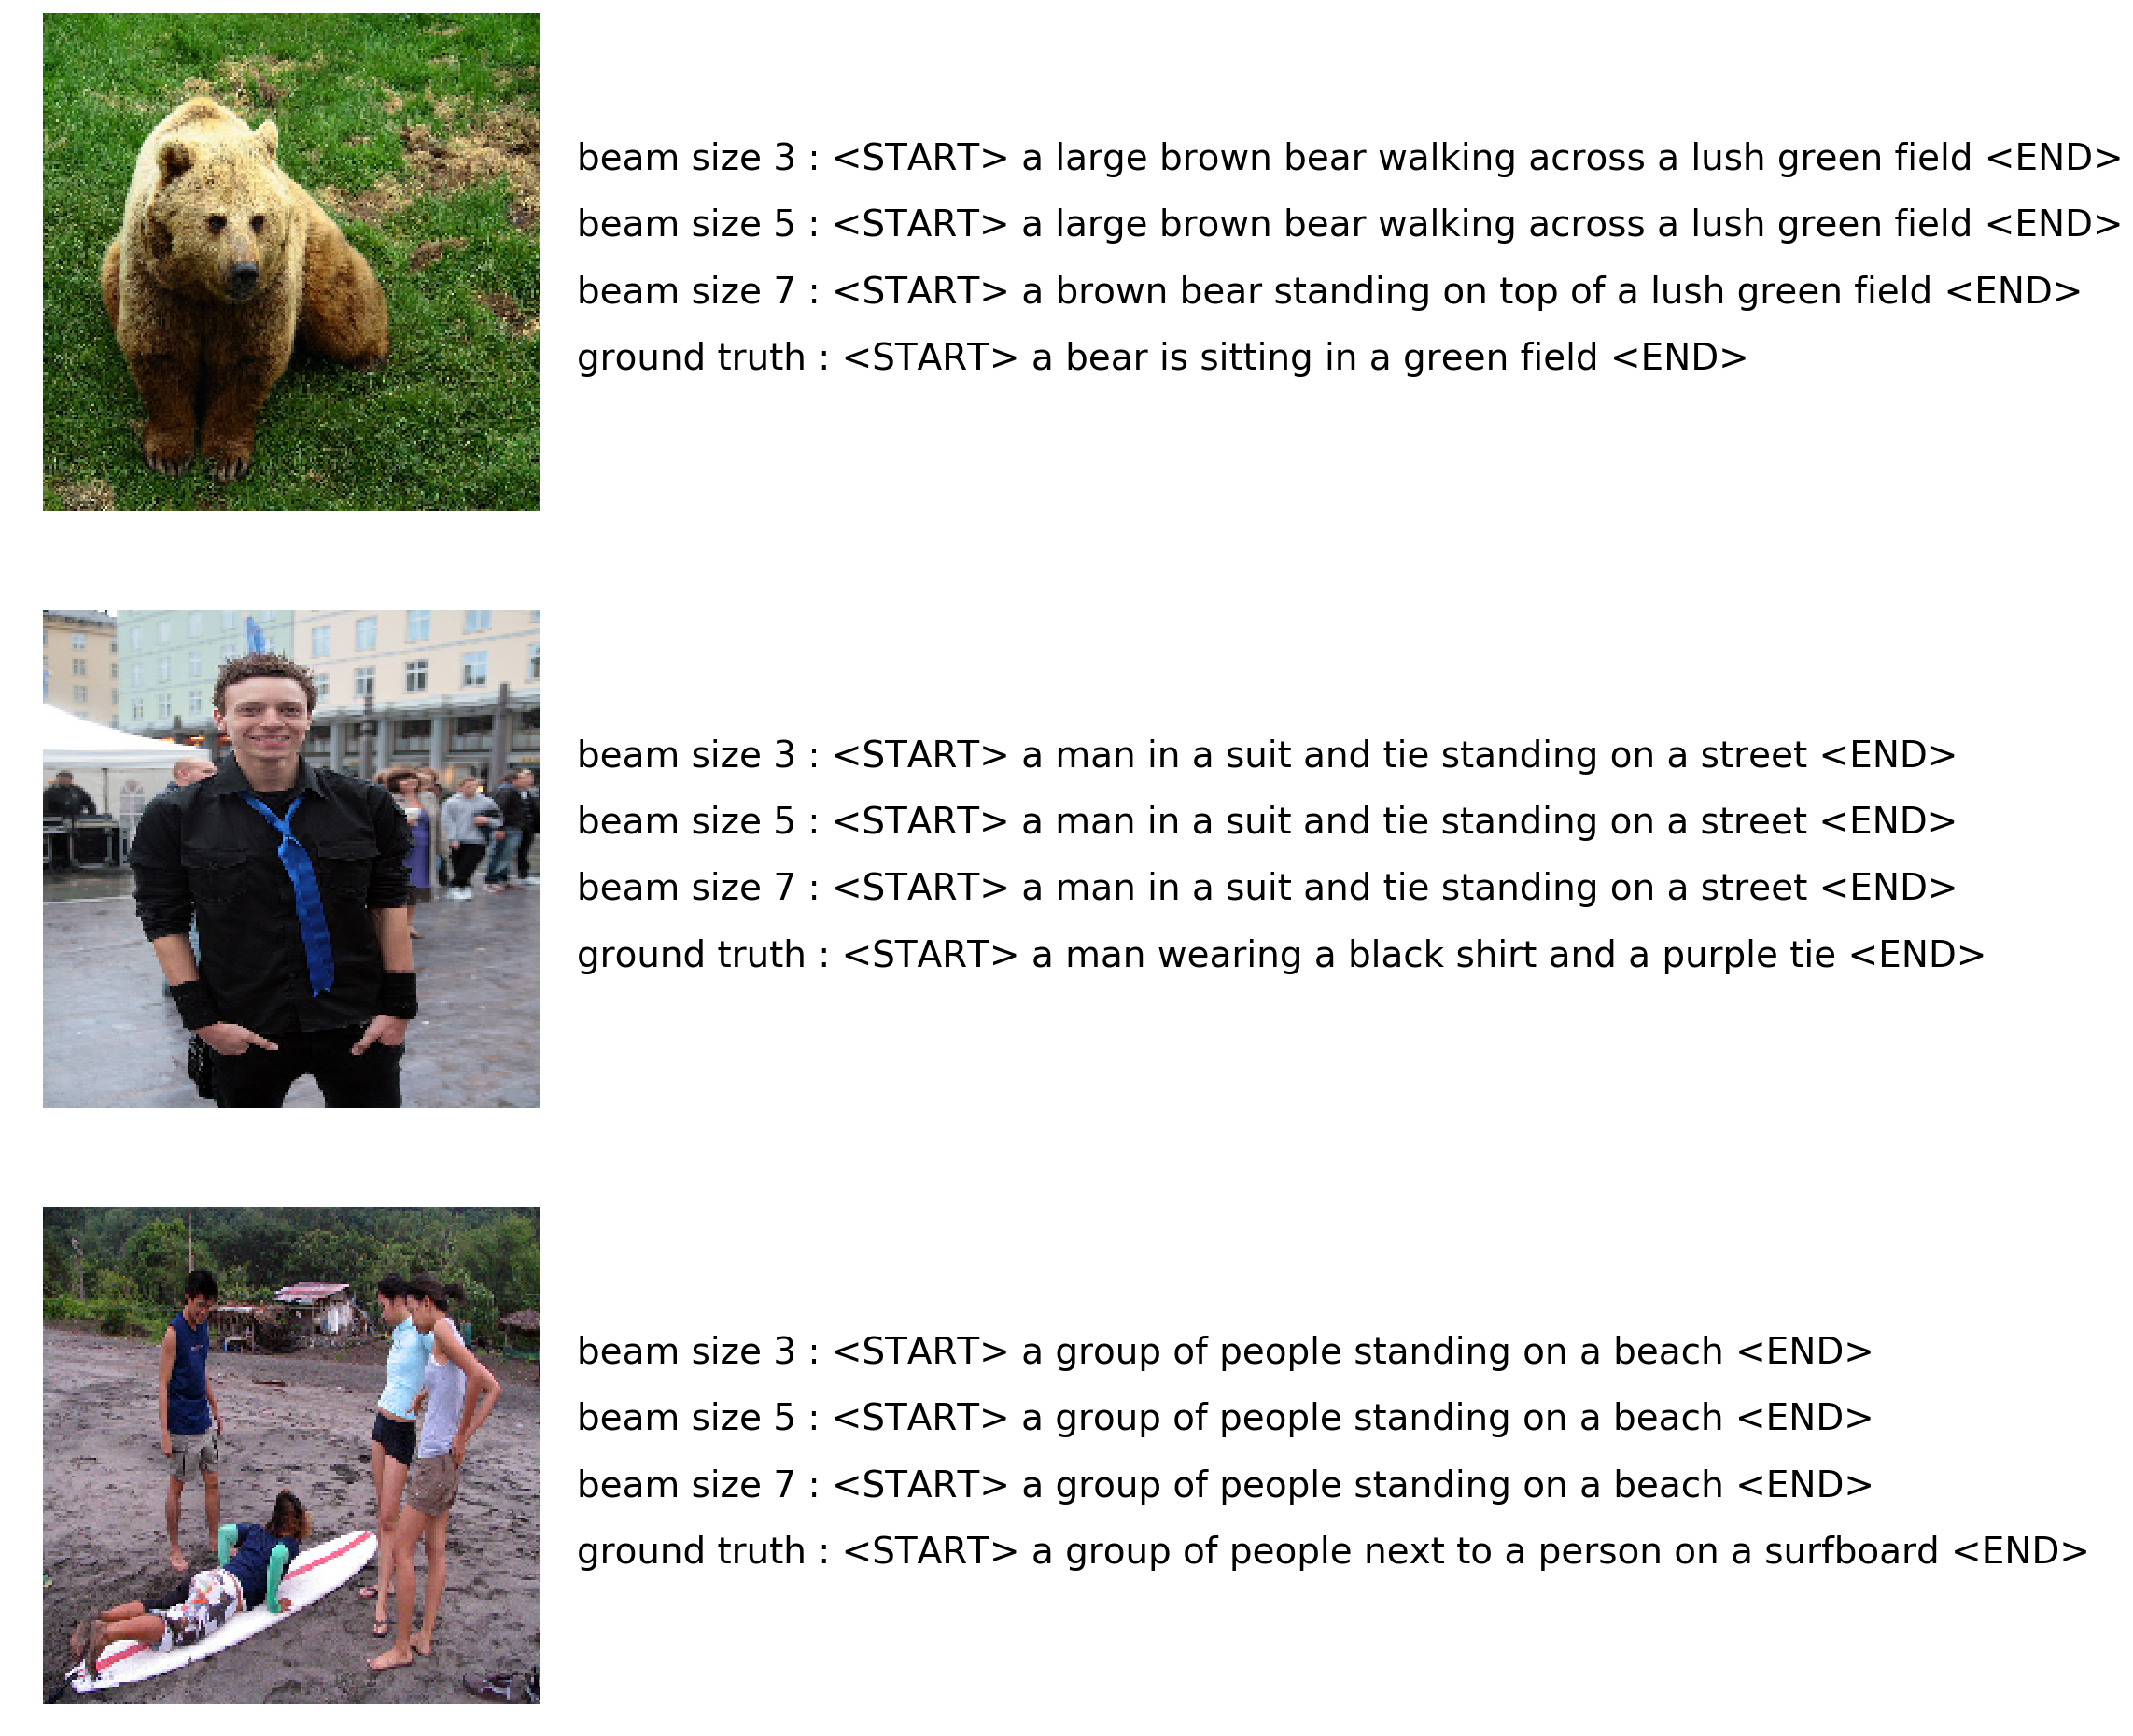

In [66]:
fig = plt.figure(dpi=100)
fig.set_size_inches(8, 24)
fig.set_facecolor('white')
for i in range(3):
    image_id = int(report.chosen['3']['medium'][i][0])
    plt.subplot(3, 1, i+1)
    plt.imshow(Image.open("/mnt/raid/davech2y/COCO_2014/val2014/{}".format(df.loc[df.image_id == image_id].file_name.drop_duplicates().iloc[0])).convert('RGBA').resize((224, 224)))
    plt.text(240, 70, 'beam size 3 : ' + report.chosen['3']['medium'][i][2], fontsize=28)
    plt.text(240, 100, 'beam size 5 : ' + report.chosen['5']['medium'][i][2], fontsize=28)
    plt.text(240, 130, 'beam size 7 : ' + report.chosen['7']['medium'][i][2], fontsize=28)
    plt.text(240, 160, 'ground truth : ' + report.chosen['7']['medium'][i][3], fontsize=28)
    plt.axis('off')
plt.show()

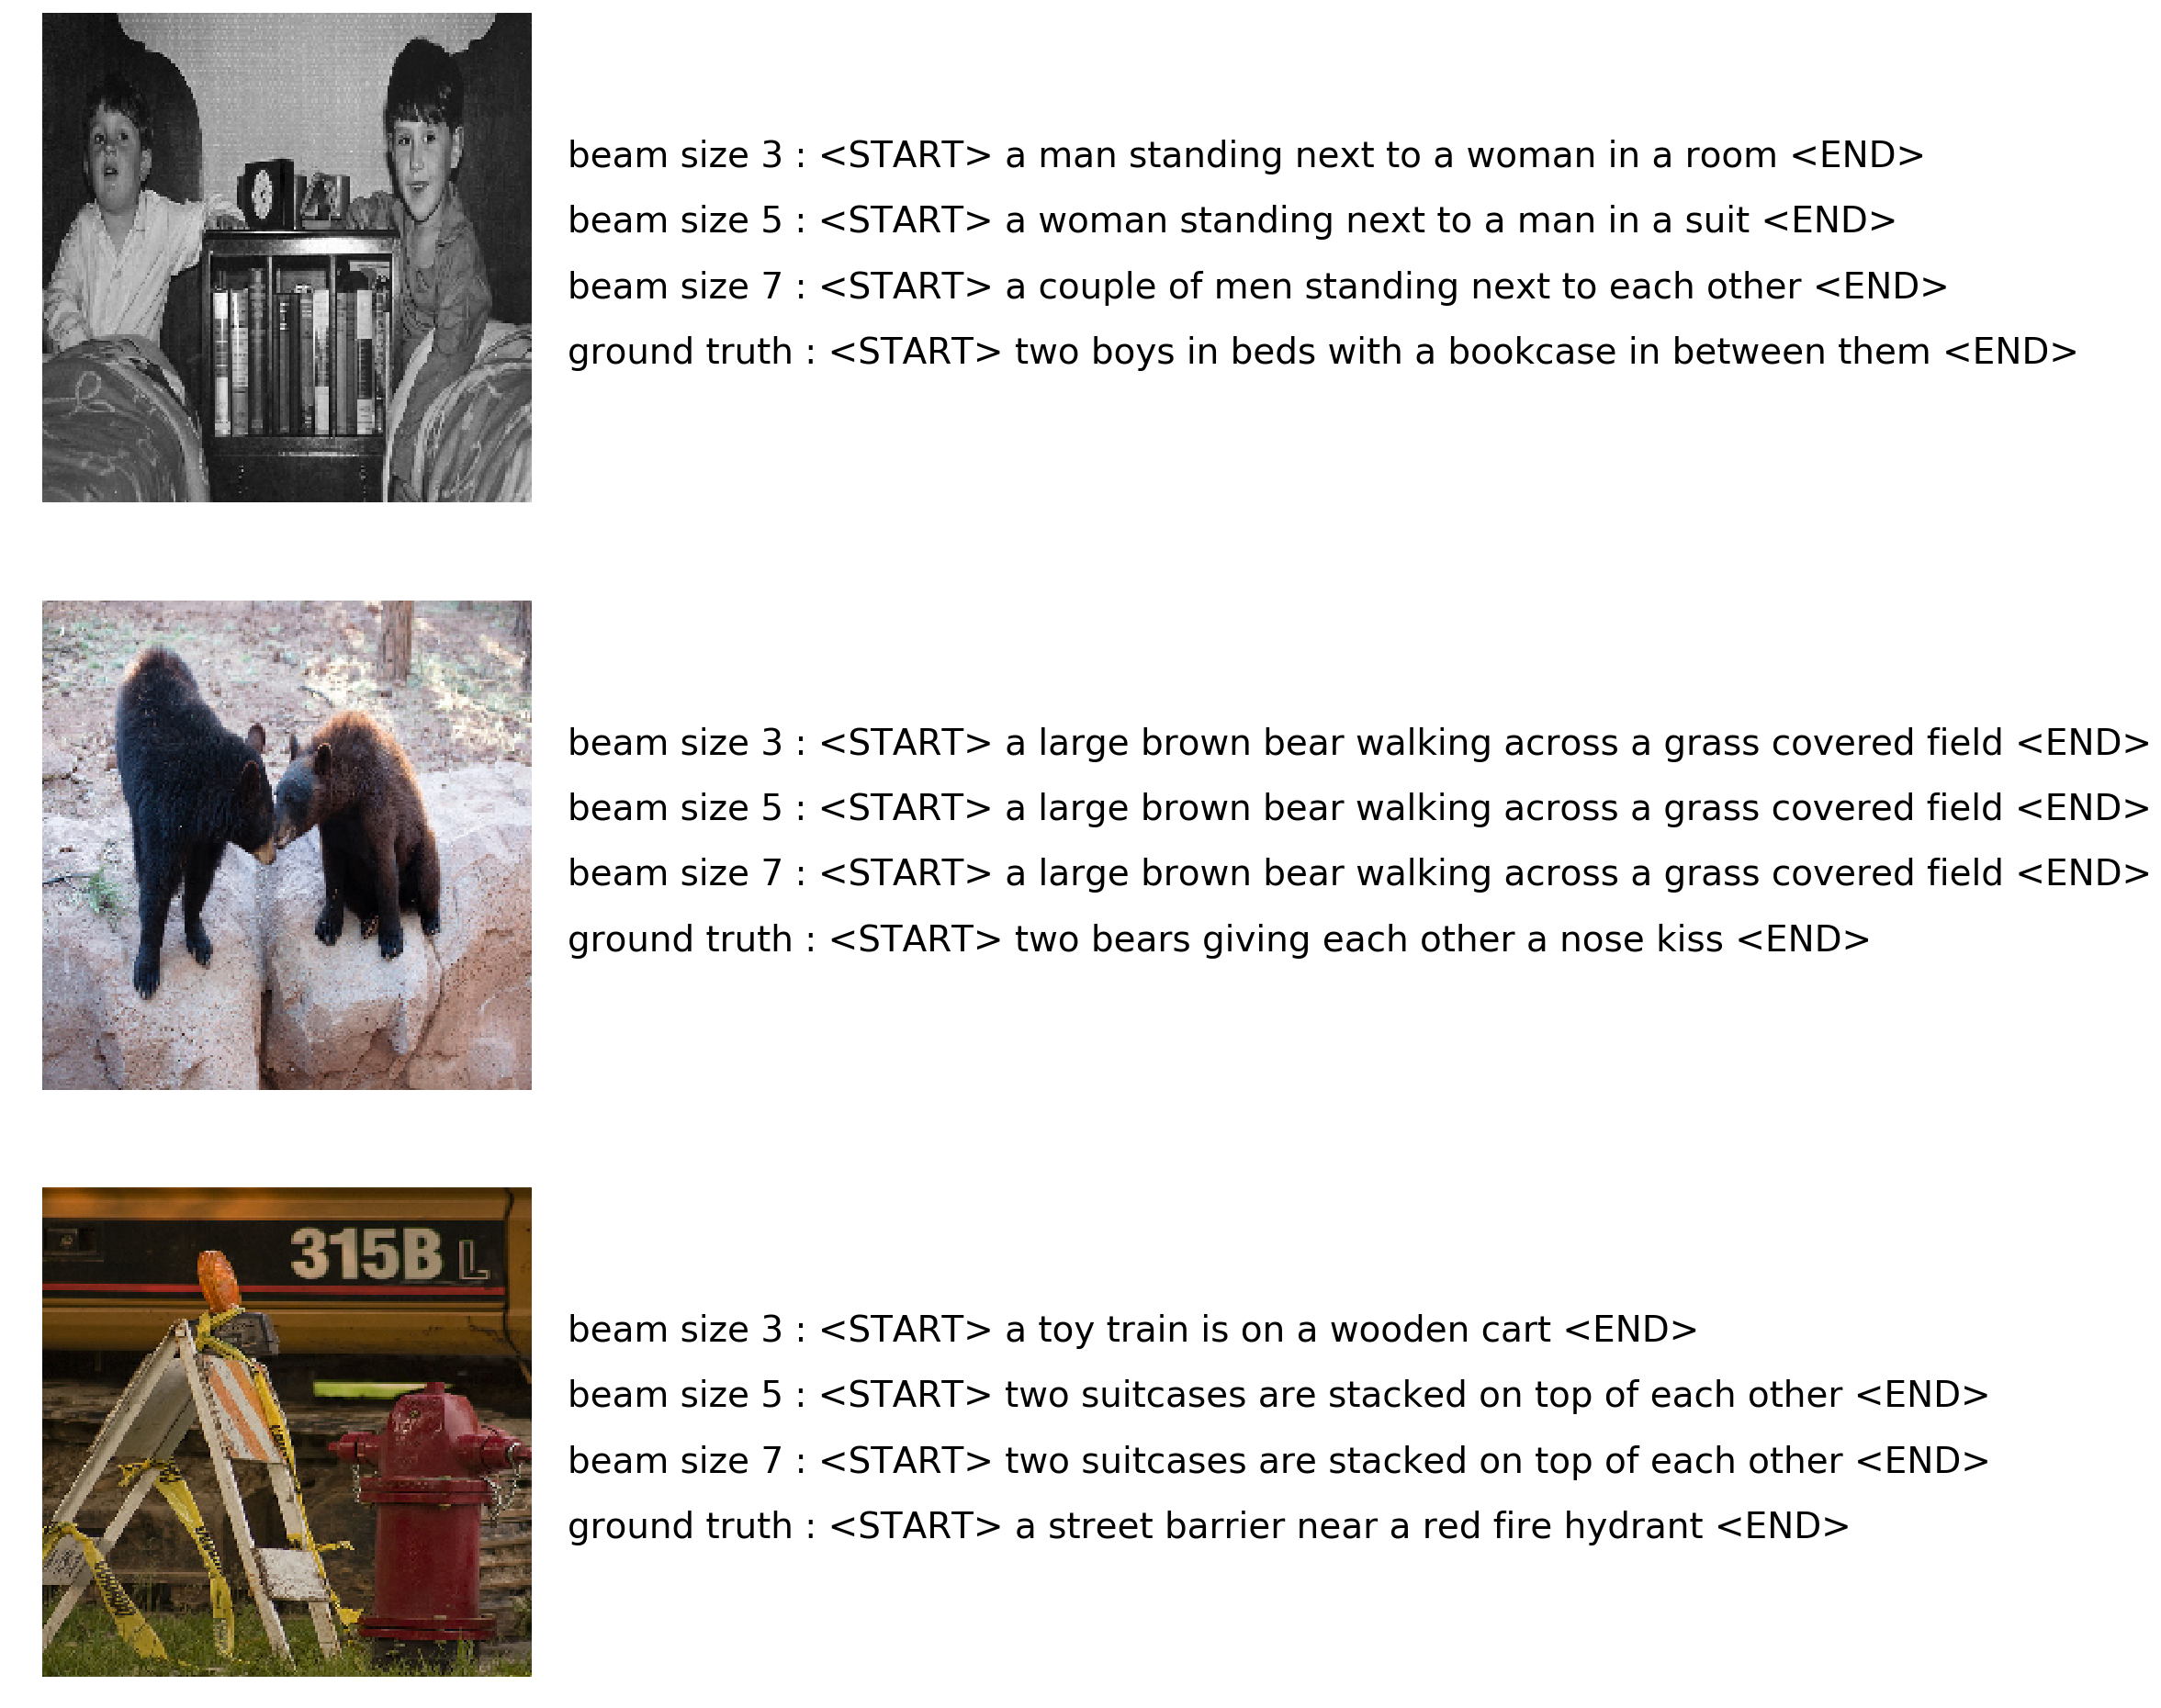

In [67]:
fig = plt.figure(dpi=100)
fig.set_size_inches(8, 24)
fig.set_facecolor('white')
for i in range(3):
    image_id = int(report.chosen['3']['low'][i][0])
    plt.subplot(3, 1, i+1)
    plt.imshow(Image.open("/mnt/raid/davech2y/COCO_2014/val2014/{}".format(df.loc[df.image_id == image_id].file_name.drop_duplicates().iloc[0])).convert('RGBA').resize((224, 224)))
    plt.text(240, 70, 'beam size 3 : ' + report.chosen['3']['low'][i][2], fontsize=28)
    plt.text(240, 100, 'beam size 5 : ' + report.chosen['5']['low'][i][2], fontsize=28)
    plt.text(240, 130, 'beam size 7 : ' + report.chosen['7']['low'][i][2], fontsize=28)
    plt.text(240, 160, 'ground truth : ' + report.chosen['7']['low'][i][3], fontsize=28)
    plt.axis('off')
plt.show()

In [129]:
image_id = int(report.chosen[3]['high'][0][0])
idx = index[str(df.loc[df.image_id == image_id].index[0])]
image = torch.Tensor(dataset[idx]).view(2048, 7, 7).unsqueeze(0)
image = Variable(image).cuda()
visual_contexts = encoder(image)
outputs = decoder.beam_search(visual_contexts, 3, 20)
outputs = decode_outputs(outputs, None, dict_idx2word, 'val')

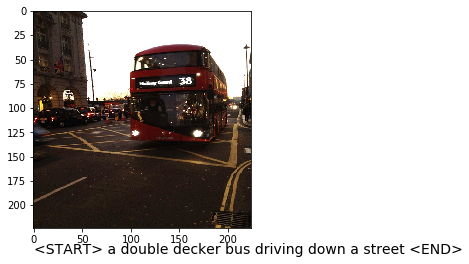

In [144]:
plt.imshow(Image.open("/mnt/raid/davech2y/COCO_2014/val2014/{}".format(df.loc[df.image_id == image_id].file_name.drop_duplicates().iloc[0])).resize((224, 224)))
plt.text(0, 250, outputs[0], fontsize=14)
plt.show()


( 0  , 0  ,.,.) = 
   0.5768   0.8308   0.6826  ...    1.6256   0.5299   0.0000
   1.6954   0.1289   0.0000  ...    1.5727   1.4385   2.3734
   0.0000   0.0000   0.0000  ...    0.9317   1.2504   1.9992
            ...               ⋱              ...            
   3.1340   1.4255   0.7062  ...    0.0000   0.0000   0.9039
   1.1197   1.0447   0.5151  ...    0.1601   0.1575   1.0837
   0.8132   0.4342   1.0919  ...    1.0355   0.8121   0.7718

( 0  , 1  ,.,.) = 
   0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
   0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
   0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000
            ...               ⋱              ...            
   0.0456   0.0302   0.4480  ...    1.9401   0.1144   0.0000
   0.0000   0.0000   0.0000  ...    0.1249   0.0894   0.0000
   0.0000   0.0000   0.0000  ...    0.0000   0.0000   0.0000

( 0  , 2  ,.,.) = 
   0.8816   0.0000   0.0000  ...    0.0000   1.6471   2.6713
   0.1809   0.2921   0.00

In [112]:
idx

3353

In [26]:
df = pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_test2014.caption.csv")
df.loc[df.image_id == 32085].file_name.drop_duplicates()[0]

'COCO_val2014_000000189806.jpg'

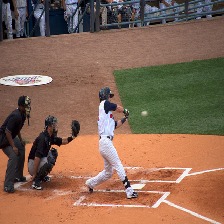

In [87]:
Image.open("/mnt/raid/davech2y/COCO_2014/val2014/COCO_val2014_000000237814.jpg").resize((224, 224))

In [35]:
for _, (model_ids, visuals, captions, cap_lengths) in enumerate(test_dl):
    break

In [37]:
for model_id, y in zip(model_ids, ):
    print(model_id, y)

10256 1
24212 1
36121 1
3690 1
10256 1
4391 1
34957 1
4391 1
34957 1
3690 1


In [36]:
coco.original_csv["val"]

image_id                                            caption  \
0         119896  a dog on the floor curled next to several pair...   
1         114145              mail is sitting on top of a microwave   
2         121816  cupcakes have crumbs and teddy bears on top of...   
3          92406                a man is in the air on a skateboard   
4         105604          some kind of animals next to a brick wall   
5          47174  a man showing a woman how to properly throw a ...   
6         105608  a person wearing a fairy outfit walking in a f...   
7          58930         a plate with a bunch of sliced fruit on it   
8          49338   a close up of two sandwiches and a bowl of sauce   
9          76057  a person standing on a grass covered field in ...   
5784      105604  a couple of brown bears sitting and standing n...   
11702     114145        the microwave has mail sitting on top of it   
23632      58930  the bowl of ravioli is next to many plastic gr...   
24005      76057        a man is on the soccer field holding a ball   
25351     105604       two brown bears inside a rocky zoo enclosure   
31633     114145   a microwave oven sitting on top of a small shelf   
33196      49338         a hearty soup and meat sandwich roll lunch   
53719      76057  a person in action on a field with some people...   
55610      76057      a soccer player holding the ball on the field   
55826     105608  people watching a match being played besides t...   
74866      47174  an indoor court with a man talking to a woman ...   
96525     105608  a bunch of people gathered in a park having a ...   
109920    119896    a dog curled up by a pair of boots on the floor   
110021     47174  a young woman holding a frisbee next to an old...   
114147     92406             a guy on a skate board high in the air   
115967     92406  a skater with long hair and a green shirt is i...   
118578     49338  two delicious looking sandwiches with soup on ...   
125246    121816             a close up of many different cup cakes   
136750    119896  a dog curled up next to a pair of winter boots...   
148931     49338  a bowl of soup on top of a boat between two sa...   
207565     76057  a competition soccer game in progress with the...   
208197    121816  the cupcakes are decorated with teddy bears on...   
237887    105604          there are two bears in the bear enclosure   
237942    114145  a microwave oven on a stand with mail atop it ...   
247088    121816  a tray holds white cupcakes with brightly colo...   
264605     49338  a couple of hoagie sandwiches next to a bowl o...   
275331     58930  a plate of ravioli is on a table with some pin...   
300635    105608  a group of people playing a game of frisbee on...   
323187     58930            a pasta dish in bowl on decorated table   
331982    105604                     two bears are in a zoo habitat   
351256    105608  why is she wearing a skirt while playing sport...   
351819    119896    a dog who is cuddled up nest to a pair of shoes   
353220    114145  a microwave oven sitting upon a small green table   
360357    119896            a dog laying against two pairs of shoes   
367652     58930             some pasta in a bowl sits on the table   
377686     92406  person doing skateboarding tricks in front of ...   
384722     92406         a man in green in the air on a skate board   
396223     47174  a man and a young woman are standing next to e...   
399735    121816  very sweet cakes painted yellow and red arrang...   
409073     47174    woman being shown how to play disc golf indoors   

                              file_name  
0       COCO_train2014_000000458478.jpg  
1       COCO_train2014_000000167395.jpg  
2       COCO_train2014_000000298914.jpg  
3       COCO_train2014_000000201929.jpg  
4       COCO_train2014_000000443308.jpg  
5       COCO_train2014_000000308722.jpg  
6       COCO_train2014_000000237222.jpg  
7       COCO_train2014_000000091530.jpg  
8       

In [37]:
coco.transformed_data["val"]

image_id                                            caption  \
0     119896  [1, 3, 19, 5, 6, 46, 36, 11, 8, 76, 47, 4, 25, 2]   
1     114145                [1, 37, 12, 20, 5, 16, 4, 3, 21, 2]   
2     121816   [1, 38, 77, 78, 10, 48, 17, 5, 16, 4, 49, 79, 2]   
3      92406              [1, 3, 13, 12, 7, 6, 26, 5, 3, 80, 2]   
4     105604            [1, 27, 81, 4, 82, 11, 8, 3, 50, 51, 2]   
5      47174     [1, 3, 13, 83, 3, 22, 52, 8, 84, 85, 3, 39, 2]   
6     105608         [1, 3, 28, 53, 3, 86, 87, 88, 7, 3, 14, 2]   
7      58930          [1, 3, 54, 9, 3, 55, 4, 89, 90, 5, 29, 2]   
8      49338     [1, 3, 56, 23, 4, 15, 30, 10, 3, 18, 4, 91, 2]   
9      76057  [1, 3, 28, 40, 5, 3, 92, 93, 14, 7, 41, 94, 57...   
10    105604  [1, 3, 58, 4, 59, 17, 20, 10, 40, 11, 8, 3, 50...   
11    114145            [1, 6, 21, 95, 37, 20, 5, 16, 4, 29, 2]   
12     58930        [1, 6, 18, 4, 60, 12, 11, 8, 61, 96, 97, 2]   
13     76057         [1, 3, 13, 12, 5, 6, 42, 14, 31, 3, 43, 2]   
14    105604              [1, 15, 59, 17, 98, 3, 99, 62, 63, 2]   
15    114145        [1, 3, 21, 44, 20, 5, 16, 4, 3, 64, 100, 2]   
16     49338         [1, 3, 101, 32, 10, 102, 103, 104, 105, 2]   
17     76057     [1, 3, 28, 7, 106, 5, 3, 14, 9, 27, 33, 65, 2]   
18     76057            [1, 3, 42, 107, 31, 6, 43, 5, 6, 14, 2]   
19    105608       [1, 33, 65, 3, 108, 66, 109, 110, 6, 111, 2]   
20     47174  [1, 41, 112, 113, 9, 3, 13, 114, 8, 3, 22, 31,...   
21    105608  [1, 3, 55, 4, 33, 116, 7, 3, 117, 118, 3, 119,...   
22    119896  [1, 3, 19, 36, 23, 121, 3, 45, 4, 67, 5, 6, 46...   
23     47174   [1, 3, 68, 22, 31, 3, 39, 11, 8, 41, 122, 13, 2]   
24     92406        [1, 3, 123, 5, 3, 69, 70, 124, 7, 6, 26, 2]   
25     92406  [1, 3, 125, 9, 126, 127, 10, 3, 34, 57, 12, 7,...   
26     49338          [1, 15, 128, 129, 30, 9, 32, 5, 3, 24, 2]   
27    121816             [1, 3, 56, 23, 4, 61, 130, 131, 71, 2]   
28    119896  [1, 3, 19, 36, 23, 11, 8, 3, 45, 4, 132, 67, 1...   
29     49338  [1, 3, 18, 4, 32, 5, 16, 4, 3, 133, 134, 15, 3...   
30     76057  [1, 3, 135, 42, 72, 7, 136, 9, 6, 137, 138, 13...   
31    121816        [1, 6, 38, 35, 73, 9, 48, 17, 5, 6, 142, 2]   
32    105604             [1, 143, 35, 15, 17, 7, 6, 144, 63, 2]   
33    114145  [1, 3, 21, 44, 5, 3, 145, 9, 37, 146, 29, 10, ...   
34    121816      [1, 3, 150, 151, 49, 38, 9, 152, 153, 154, 2]   
35     49338     [1, 3, 58, 4, 155, 30, 11, 8, 3, 18, 4, 32, 2]   
36     58930  [1, 3, 54, 4, 60, 12, 5, 3, 24, 9, 27, 156, 15...   
37    105608  [1, 3, 158, 4, 33, 74, 3, 72, 4, 39, 5, 16, 4,...   
38     58930               [1, 3, 75, 160, 7, 18, 5, 73, 24, 2]   
39    105604                  [1, 15, 17, 35, 7, 3, 62, 161, 2]   
40    105608  [1, 162, 12, 163, 53, 3, 164, 165, 74, 166, 7,...   
41    119896  [1, 3, 19, 167, 12, 168, 23, 169, 8, 3, 45, 4,...   
42    114145          [1, 3, 21, 44, 20, 170, 3, 64, 34, 24, 2]   
43    119896             [1, 3, 19, 171, 172, 15, 47, 4, 25, 2]   
44     58930            [1, 27, 75, 7, 3, 18, 173, 5, 6, 24, 2]   
45     92406       [1, 28, 174, 175, 176, 7, 177, 4, 3, 178, 2]   
46     92406       [1, 3, 13, 7, 34, 7, 6, 26, 5, 3, 69, 70, 2]   
47     47174   [1, 3, 13, 10, 3, 68, 22, 35, 40, 11, 8, 179, 2]   
48    121816  [1, 180, 181, 71, 182, 183, 10, 184, 185, 186, 2]   
49     47174     [1, 22, 66, 187, 52, 8, 188, 189, 190, 191, 2]   

                          file_name  
0   COCO_train2014_000000458478.jpg  
1   COCO_train2014_000000167395.jpg  
2   COCO_train2014_000000298914.jpg  
3   COCO_train2014_000000201929.jpg  
4   COCO_train2014_000000443308.jpg  
5   COCO_train2014_000000308722.jpg  
6   COCO_train2014_000000237222.jpg  
7   COCO_train2014_000000091530.jpg  
8   COCO_train2014_000000500060.jpg  
9   COCO_train2014_000000033429.jpg  
10  COCO_train2014_000000443308.jpg  
11  COCO_train2014_000000167395.jpg  
12  COCO_train2014_000000091530.jpg  
13  COCO_train2014_000000033429.jpg  
14  COCO_train20

In [38]:
coco.preprocessed_data["val"]

image_id                                            caption  \
0     119896  <START> a dog on the floor curled next to seve...   
1     114145  <START> mail is sitting on top of a microwave ...   
2     121816  <START> cupcakes have crumbs and teddy bears o...   
3      92406  <START> a man is in the air on a skateboard <END>   
4     105604  <START> some kind of animals next to a brick w...   
5      47174  <START> a man showing a woman how to properly ...   
6     105608  <START> a person wearing a fairy outfit walkin...   
7      58930  <START> a plate with a bunch of sliced fruit o...   
8      49338  <START> a close up of two sandwiches and a bow...   
9      76057  <START> a person standing on a grass covered f...   
10    105604  <START> a couple of brown bears sitting and st...   
11    114145  <START> the microwave has mail sitting on top ...   
12     58930  <START> the bowl of ravioli is next to many pl...   
13     76057  <START> a man is on the soccer field holding a...   
14    105604  <START> two brown bears inside a rocky zoo enc...   
15    114145  <START> a microwave oven sitting on top of a s...   
16     49338  <START> a hearty soup and meat sandwich roll l...   
17     76057  <START> a person in action on a field with som...   
18     76057  <START> a soccer player holding the ball on th...   
19    105608  <START> people watching a match being played b...   
20     47174  <START> an indoor court with a man talking to ...   
21    105608  <START> a bunch of people gathered in a park h...   
22    119896  <START> a dog curled up by a pair of boots on ...   
23     47174  <START> a young woman holding a frisbee next t...   
24     92406  <START> a guy on a skate board high in the air...   
25     92406  <START> a skater with long hair and a green sh...   
26     49338  <START> two delicious looking sandwiches with ...   
27    121816  <START> a close up of many different cup cakes...   
28    119896  <START> a dog curled up next to a pair of wint...   
29     49338  <START> a bowl of soup on top of a boat betwee...   
30     76057  <START> a competition soccer game in progress ...   
31    121816  <START> the cupcakes are decorated with teddy ...   
32    105604  <START> there are two bears in the bear enclos...   
33    114145  <START> a microwave oven on a stand with mail ...   
34    121816  <START> a tray holds white cupcakes with brigh...   
35     49338  <START> a couple of hoagie sandwiches next to ...   
36     58930  <START> a plate of ravioli is on a table with ...   
37    105608  <START> a group of people playing a game of fr...   
38     58930  <START> a pasta dish in bowl on decorated tabl...   
39    105604       <START> two bears are in a zoo habitat <END>   
40    105608  <START> why is she wearing a skirt while playi...   
41    119896  <START> a dog who is cuddled up nest to a pair...   
42    114145  <START> a microwave oven sitting upon a small ...   
43    119896  <START> a dog laying against two pairs of shoe...   
44     58930  <START> some pasta in a bowl sits on the table...   
45     92406  <START> person doing skateboarding tricks in f...   
46     92406  <START> a man in green in the air on a skate b...   
47     47174  <START> a man and a young woman are standing n...   
48    121816  <START> very sweet cakes painted yellow and re...   
49     47174  <START> woman being shown how to play disc gol...   

                          file_name  
0   COCO_train2014_000000458478.jpg  
1   COCO_train2014_000000167395.jpg  
2   COCO_train2014_000000298914.jpg  
3   COCO_train2014_000000201929.jpg  
4   COCO_train2014_000000443308.jpg  
5   COCO_train2014_000000308722.jpg  
6   COCO_train2014_000000237222.jpg  
7   COCO_train2014_000000091530.jpg  
8   COCO_train2014_000000500060.jpg  
9   COCO_train2014_000000033429.jpg  
10  COCO_train2014_000000443308.jpg  
11  COCO_train2014_000000167395.jpg  
12  COCO_train2014_000000091530.jpg  
13  COCO_train2014_000000033429.jpg  
14  COCO_train20

In [19]:
index = json.load(open("/mnt/raid/davech2y/COCO_2014/preprocessed/train_index.json", "r"))

In [20]:
dataset = h5py.File("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014_224.hdf5", "r")

In [21]:
temp = dataset["images"][0].reshape(3, 224, 224)

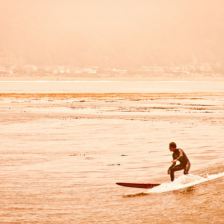

In [22]:
temp = torch.FloatTensor(temp)
temp[0] = temp[0] * 0.229 + 0.485
temp[1] = temp[1] * 0.224 + 0.456
temp[2] = temp[2] * 0.225 + 0.406
torchvision.transforms.ToPILImage()(temp)

In [21]:
df = pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014.caption.csv")
l = df.file_name.values.tolist()

In [23]:
df.caption.values.tolist()[308450]

'an old woman and a middle aged woman sitting on a boat the middle aged woman is holding a stuffed panda bear'

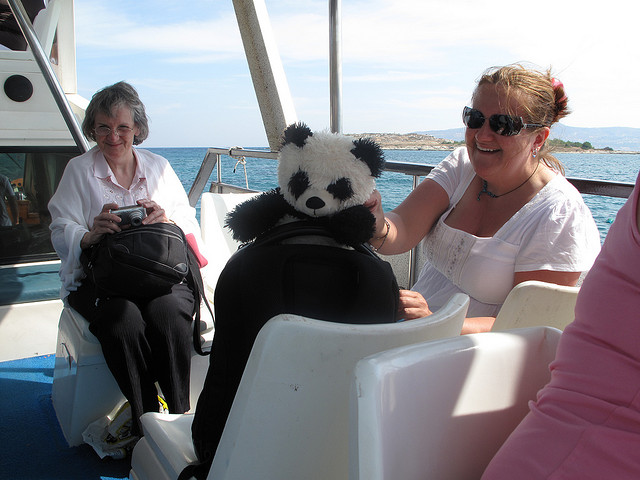

In [24]:
Image.open("/mnt/raid/davech2y/COCO_2014/train2014/{}".format("COCO_train2014_000000289248.jpg"))

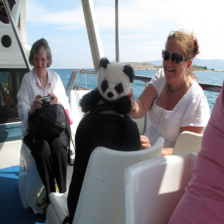

In [34]:
image = Image.open("/mnt/raid/davech2y/COCO_2014/train2014/{}".format(l[414112]))
trans = transforms.Compose([
    transforms.Resize((224, 224)),
#     transforms.CenterCrop(224),
    transforms.ToTensor()
])
image = trans(image)
image = image.expand(3, image.size(1), image.size(2))
transforms.ToPILImage()(image)

In [257]:
train_size = 100
valid_size = 10
batch_size = 2
coco = COCO(
    pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014.caption.csv"), 
#     pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014.caption.csv"), 
    pandas.read_csv("/mnt/raid/davech2y/COCO_2014/preprocessed/coco_valid2014.caption.csv"),
    [train_size, valid_size]
)
train_captions = coco.transformed_data['train']
valid_captions = coco.transformed_data['valid']
dict_idx2word = coco.dict_idx2word
dict_word2idx = coco.dict_word2idx
corpus = coco.corpus
train_ds = COCOCaptionDataset(
    None,
    train_captions, 
    database="/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014_224_new.hdf5"
)
valid_ds = COCOCaptionDataset(
    None, 
    valid_captions,
    database="/mnt/raid/davech2y/COCO_2014/preprocessed/coco_valid2014_224_new.hdf5"
#     database="/mnt/raid/davech2y/COCO_2014/preprocessed/coco_train2014_224_new.hdf5"
)
train_dl = DataLoader(train_ds, batch_size=batch_size)
valid_dl = DataLoader(valid_ds, batch_size=batch_size)
dataloader = {
    'train': train_dl,
    'valid': valid_dl
}

In [239]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.ReLU()
        )
    
    def forward(self, inputs, caption_inputs):
        visual_encoded = self.encoder(inputs)
        outputs = self.decoder(visual_encoded)
        
        return outputs

In [240]:
class AE_skip(nn.Module):
    def __init__(self):
        super(AE_skip, self).__init__()
        self.encoder_1 = nn.Sequential(
            # (3, 224, 224)
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.encoder_2 = nn.Sequential(
            # (8, 112, 112)
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.encoder_3 = nn.Sequential(
            # (16, 56, 56)
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.encoder_4 = nn.Sequential(
            # (32, 28, 28)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # (64, 14, 14)
        )
        self.encoder_5 = nn.Sequential( 
            # (64, 14, 14)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # (128, 7, 7)
        )

        self.decoder_1 = nn.Sequential(
            # (128, 7, 7)
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            # (64, 14, 14)
        )
        self.decoder_2 = nn.Sequential(    
            # (128, 14, 14)
            nn.ConvTranspose2d(128, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            # (32, 28, 28)
        )
        self.decoder_3 = nn.Sequential(
            # (64, 28, 28)
            nn.ConvTranspose2d(64, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            # (16, 56, 56)
        )
        self.decoder_4 = nn.Sequential(
            # (32, 56, 56)
            nn.ConvTranspose2d(32, 8, kernel_size=2, stride=2),
            nn.ReLU()
            # (8, 112, 112)
        )
        self.decoder_5 = nn.Sequential(
            # (8, 112, 112)
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.ReLU()
            # (3, 224, 224)
        )
    
    
    def forward(self, inputs, caption_inputs):
        encoded_1 = self.encoder_1(inputs)
        encoded_2 = self.encoder_2(encoded_1)
        encoded_3 = self.encoder_3(encoded_2)
        encoded_4 = self.encoder_4(encoded_3)
        encoded_5 = self.encoder_5(encoded_4)
        decoded_1 = self.decoder_1(encoded_5)
        decoded_2 = self.decoder_2(torch.cat((decoded_1, encoded_4), dim=1))
        decoded_3 = self.decoder_3(torch.cat((decoded_2, encoded_3), dim=1))
        decoded_4 = self.decoder_4(torch.cat((decoded_3, encoded_2), dim=1))
        outputs = self.decoder_5(torch.cat((decoded_4, encoded_1), dim=1))
        
        return outputs

In [241]:
class AttnAE(nn.Module):
    def __init__(self, dict_size):
        super(AttnAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=2, stride=2),
            nn.ReLU()
        )
        self.comp_visual = nn.Linear(256, 512)
        self.comp_hidden = nn.Linear(512, 512)
        self.attn_combine = nn.Linear(512, 1)
        self.embedding = nn.Embedding(dict_size, 512)
        self.text_encoder = nn.LSTMCell(512, 512)
    
    def initHidden(self, visual_encoded):
        states = (
            Variable(torch.zeros(visual_encoded.size(0), 512)),
            Variable(torch.zeros(visual_encoded.size(0), 512))
        )
        
        return states
    
    def attention(self, visual_encoded, hiddens):
        inputs = visual_encoded.view(visual_encoded.size(0), visual_encoded.size(1), -1)
        inputs = inputs.transpose(2, 1).contiguous()
        V = self.comp_visual(inputs)
        H = self.comp_hidden(hiddens).unsqueeze(1)
        outputs = F.tanh(V + H)
        outputs = self.attn_combine(outputs).squeeze()
        outputs = F.softmax(outputs, dim=1)
        
        return outputs
    
    def forward(self, inputs, caption_inputs):
        visual_encoded = self.encoder(inputs)
        states = self.initHidden(visual_encoded)
        seq_length = caption_inputs.size(1)
        attn_inputs = []
        for step in range(seq_length):
            embedded = self.embedding(caption_inputs[:, step])
            states = self.text_encoder(embedded, states)
            attn_inputs.append(states[0].unsqueeze(1))
        attn_inputs = torch.cat(attn_inputs, dim=1)
        attn_inputs = attn_inputs.mean(1)
        attn_weights = self.attention(visual_encoded, attn_inputs)
        attended = visual_encoded.view(visual_encoded.size(0), visual_encoded.size(1), -1) * attn_weights.unsqueeze(1)
        outputs = self.decoder(attended.view(attended.size(0), attended.size(1), int(np.sqrt(attended.size(2))), int(np.sqrt(attended.size(2)))))
        
        return outputs

In [267]:
# model = AE()
# model = AE_skip()
model = AttnAE(dict_idx2word.__len__() + 1)
cr = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [268]:
train_loss = []
valid_loss = []
for e in range(1000):
    for phase in ["train", "valid"]:
        for model_ids, visuals, captions, cap_lengths in dataloader[phase]:
            inputs = Variable(visuals)
            caption_inputs = Variable(torch.cat([item.view(1, -1) for item in captions]).transpose(1, 0)[:, :cap_lengths[0]])
        if phase == "train":
            outputs = model(inputs, caption_inputs)
            loss = cr(outputs, visuals)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        else:
            outputs = model(inputs, caption_inputs)
            loss = cr(outputs, visuals)
            valid_loss.append(loss.item())
    print("train_loss: ", np.mean(train_loss))
    print("valid_loss: ", np.mean(valid_loss))
    print()

train_loss:  0.6891844868659973
valid_loss:  2.10486102104187

train_loss:  0.6887588202953339
valid_loss:  2.1050050258636475

train_loss:  0.6882631182670593
valid_loss:  2.1051151752471924

train_loss:  0.6877636909484863
valid_loss:  2.1052971482276917

train_loss:  0.6872735738754272
valid_loss:  2.1053910732269285

train_loss:  0.6867790718873342
valid_loss:  2.1053696473439536

train_loss:  0.6862679975373405
valid_loss:  2.1053166730063304

train_loss:  0.6857545077800751
valid_loss:  2.1052703261375427

train_loss:  0.685241805182563
valid_loss:  2.1052623060014515

train_loss:  0.6847241163253784
valid_loss:  2.105283832550049

train_loss:  0.6841976100748236
valid_loss:  2.1053396571766245

train_loss:  0.6836624095837275
valid_loss:  2.10539577404658

train_loss:  0.6831191044587356
valid_loss:  2.1054421204787035

train_loss:  0.6825741274016244
valid_loss:  2.1054767881120955

train_loss:  0.6820244828859965
valid_loss:  2.105526399612427

train_loss:  0.6814702451229095


train_loss:  0.4445218814071268
valid_loss:  1.7318155774846673

train_loss:  0.44340063689291015
valid_loss:  1.7289605676665787

train_loss:  0.4422947755226722
valid_loss:  1.726108208986429

train_loss:  0.4411994914972145
valid_loss:  1.7232898501039462

train_loss:  0.4401171649947311
valid_loss:  1.7205040030407184

train_loss:  0.4390472149042259
valid_loss:  1.7177071786464606

train_loss:  0.4379922760956323
valid_loss:  1.714968463378166

train_loss:  0.43694955794899554
valid_loss:  1.7122455261371754

train_loss:  0.4359194024959031
valid_loss:  1.7095883129274143

train_loss:  0.43490077653070436
valid_loss:  1.7070131458505227

train_loss:  0.4338946130828581
valid_loss:  1.70441346410392

train_loss:  0.43290238886428395
valid_loss:  1.7019114279918532

train_loss:  0.43192120109285626
valid_loss:  1.6994261886392321

train_loss:  0.4309496725281925
valid_loss:  1.6969760453447382

train_loss:  0.4299888398865579
valid_loss:  1.6945627793459825

train_loss:  0.429038902

train_loss:  0.3659504478371988
valid_loss:  1.5442282205491553

train_loss:  0.3656036527717815
valid_loss:  1.5434905608495078

train_loss:  0.3652589627308771
valid_loss:  1.5427845972590148

train_loss:  0.3649180781980433
valid_loss:  1.542035318534198

train_loss:  0.3645811467900757
valid_loss:  1.5413378514060678

train_loss:  0.36424559481355673
valid_loss:  1.540618422408822

train_loss:  0.36391076560203844
valid_loss:  1.5398958206176758

train_loss:  0.3635775146584858
valid_loss:  1.5391893158470533

train_loss:  0.36324640744515047
valid_loss:  1.5384761267945966

train_loss:  0.3629179845064765
valid_loss:  1.537782353140102

train_loss:  0.36259176514365454
valid_loss:  1.5370807882511255

train_loss:  0.36226709113930755
valid_loss:  1.5364039133179863

train_loss:  0.3619441456140432
valid_loss:  1.5357126813185842

train_loss:  0.36162315459733596
valid_loss:  1.5350279071357813

train_loss:  0.3613040190356881
valid_loss:  1.5343602201831874

train_loss:  0.3609873

train_loss:  0.33500240092214784
valid_loss:  1.4826550229599602

train_loss:  0.3348253104943303
valid_loss:  1.4823653116000919

train_loss:  0.3346489357386584
valid_loss:  1.4820783088344553

train_loss:  0.3344734271419266
valid_loss:  1.4817818689595315

train_loss:  0.3342990595847368
valid_loss:  1.4815138140693307

train_loss:  0.3341259544545954
valid_loss:  1.481215781050843

train_loss:  0.33395431186868735
valid_loss:  1.4809611983249842

train_loss:  0.33378392773697235
valid_loss:  1.4806693881673099

train_loss:  0.33361538768429116
valid_loss:  1.480416191300166

train_loss:  0.33344840329226616
valid_loss:  1.4801417484994412

train_loss:  0.3332826805420411
valid_loss:  1.4798804338161762

train_loss:  0.3331156821202134
valid_loss:  1.479602950003446

train_loss:  0.3329470387983079
valid_loss:  1.4793382980385605

train_loss:  0.3327795301988228
valid_loss:  1.479084512962943

train_loss:  0.33261402533744194
valid_loss:  1.4788079597623216

train_loss:  0.33244915

train_loss:  0.3175509657431026
valid_loss:  1.4563049761202966

train_loss:  0.31744145723959866
valid_loss:  1.4561707517334226

train_loss:  0.3173324126075572
valid_loss:  1.456026321086358

train_loss:  0.31722382343354066
valid_loss:  1.4558911761506836

train_loss:  0.31711570906872844
valid_loss:  1.4557487667775622

train_loss:  0.3170080491124767
valid_loss:  1.455618467816168

train_loss:  0.31690066849114373
valid_loss:  1.4554785597138107

train_loss:  0.31679353687265926
valid_loss:  1.4553499416998255

train_loss:  0.31668660844810276
valid_loss:  1.4552120846996974

train_loss:  0.3165799062807583
valid_loss:  1.4550784803131251

train_loss:  0.3164734792455222
valid_loss:  1.4549466189025908

train_loss:  0.3163673288010536
valid_loss:  1.454813937845728

train_loss:  0.31626202517034463
valid_loss:  1.4546830939510154

train_loss:  0.3161567602888008
valid_loss:  1.4545460849828113

train_loss:  0.3160520024597645
valid_loss:  1.4544210631113785

train_loss:  0.315947

train_loss:  0.3062314434047741
valid_loss:  1.4438755876278575

train_loss:  0.30615686772370604
valid_loss:  1.4438140565561834

train_loss:  0.3060823998616697
valid_loss:  1.4437431358388546

train_loss:  0.3060081038418717
valid_loss:  1.443686035674388

train_loss:  0.3059339602975725
valid_loss:  1.4436167364225447

train_loss:  0.30585986202702603
valid_loss:  1.443553120599624

train_loss:  0.3057858573979345
valid_loss:  1.443486454344842

train_loss:  0.30571207525398064
valid_loss:  1.4434210854890015

train_loss:  0.3056384182535112
valid_loss:  1.443357020802796

train_loss:  0.3055648957604365
valid_loss:  1.44329745460784

train_loss:  0.30549150839958605
valid_loss:  1.4432360446341683

train_loss:  0.3054182255064162
valid_loss:  1.4431757858344594

train_loss:  0.305345098470679
valid_loss:  1.4431142671878294

train_loss:  0.3052720768045085
valid_loss:  1.44305068614871

train_loss:  0.3051992193925491
valid_loss:  1.4429885340917958

train_loss:  0.305126504653019

train_loss:  0.2980290716894373
valid_loss:  1.4381365575023948

train_loss:  0.2979752317463097
valid_loss:  1.4380968951865247

train_loss:  0.2979216872862541
valid_loss:  1.438080926918952

train_loss:  0.29786757467769265
valid_loss:  1.4380479686529304

train_loss:  0.297812533448908
valid_loss:  1.4380196848515603

train_loss:  0.29775780271641245
valid_loss:  1.4380021716287623

train_loss:  0.29770384750335044
valid_loss:  1.4379596219343298

train_loss:  0.297650181788066
valid_loss:  1.4379449531863937

train_loss:  0.2975962411082863
valid_loss:  1.437906192054649

train_loss:  0.2975420163711533
valid_loss:  1.4378788039709132

train_loss:  0.29748770137292047
valid_loss:  1.4378569563281551

train_loss:  0.297433588915057
valid_loss:  1.4378121606715313

train_loss:  0.29737988172338164
valid_loss:  1.4377983912110484

train_loss:  0.2973267643331246
valid_loss:  1.4377589392538515

train_loss:  0.29727401481254595
valid_loss:  1.4377356826256658

train_loss:  0.297220890

train_loss:  0.2919160624681893
valid_loss:  1.435067168063363

train_loss:  0.2918727315508216
valid_loss:  1.435052690064665

train_loss:  0.29182943308635656
valid_loss:  1.435033555632917

train_loss:  0.29178622579789376
valid_loss:  1.4350157776125916

train_loss:  0.2917431071652068
valid_loss:  1.4349986523959715

train_loss:  0.29170006490155553
valid_loss:  1.4349786536077436

train_loss:  0.2916571117611445
valid_loss:  1.434965086170586

train_loss:  0.2916142694284563
valid_loss:  1.434942391554871

train_loss:  0.2915715958343241
valid_loss:  1.4349328203404204

train_loss:  0.2915290853121137
valid_loss:  1.4349099276316513

train_loss:  0.2914868163662916
valid_loss:  1.434902014679083

train_loss:  0.2914447627762066
valid_loss:  1.4348790408777339

train_loss:  0.2914029341544063
valid_loss:  1.4348735554162475

train_loss:  0.2913612261049466
valid_loss:  1.43485021312412

train_loss:  0.2913196948134196
valid_loss:  1.434844603262701

train_loss:  0.2912781203455395

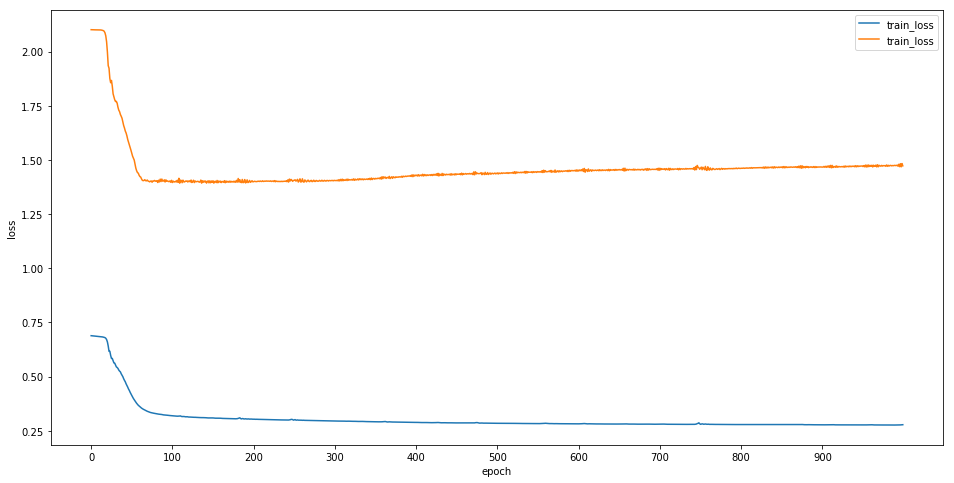

In [263]:
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(range(1000), train_loss, label="train_loss")
plt.plot(range(1000), valid_loss, label="train_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(range(0, 1000, 100))
plt.legend()
plt.show()

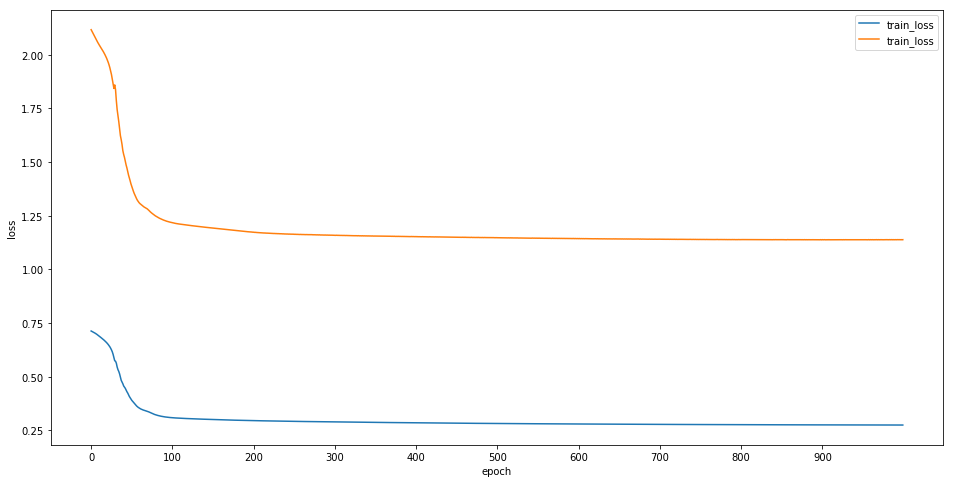

In [266]:
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(range(1000), train_loss, label="train_loss")
plt.plot(range(1000), valid_loss, label="train_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(range(0, 1000, 100))
plt.legend()
plt.show()

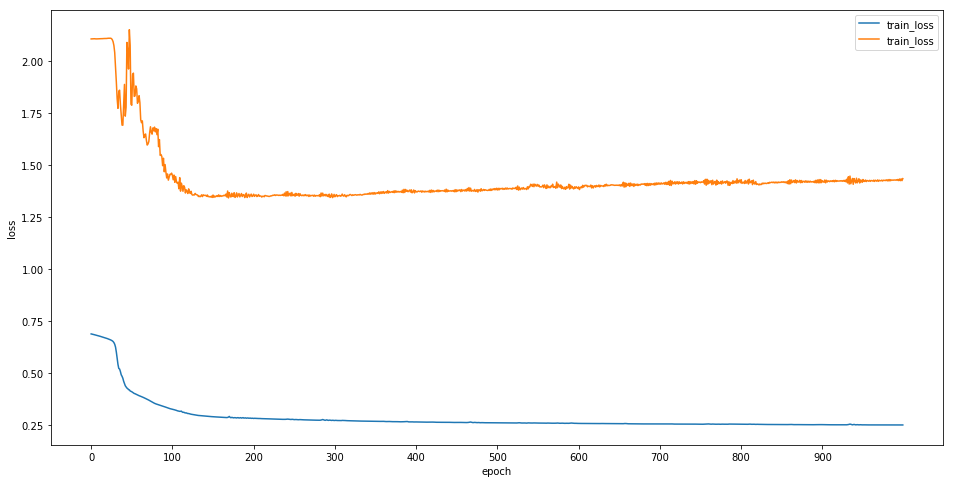

In [269]:
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.plot(range(1000), train_loss, label="train_loss")
plt.plot(range(1000), valid_loss, label="train_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xticks(range(0, 1000, 100))
plt.legend()
plt.show()